# Face Generation

In this project, you'll define and train a DCGAN on a dataset of faces. Your goal is to get a generator network to generate *new* images of faces that look as realistic as possible!

The project will be broken down into a series of tasks from **loading in data to defining and training adversarial networks**. At the end of the notebook, you'll be able to visualize the results of your trained Generator to see how it performs; your generated samples should look like fairly realistic faces with small amounts of noise.

### Get the Data

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

This dataset is more complex than the number datasets (like MNIST or SVHN) you've been working with, and so, you should prepare to define deeper networks and train them for a longer time to get good results. It is suggested that you utilize a GPU for training.

### Pre-processed Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='assets/processed_face_data.png' width=60% />

> If you are working locally, you can download this data [by clicking here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)

This is a zip file that you'll need to extract in the home directory of this notebook for further loading and processing. After extracting the data, you should be left with a directory of data `processed_celeba_small/`

In [3]:
# can comment out after executing
!unzip processed-celeba-small.zip

Archive:  processed-celeba-small.zip
   creating: processed_celeba_small/
  inflating: processed_celeba_small/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/processed_celeba_small/
  inflating: __MACOSX/processed_celeba_small/._.DS_Store  
   creating: processed_celeba_small/celeba/
  inflating: processed_celeba_small/celeba/.DS_Store  
   creating: __MACOSX/processed_celeba_small/celeba/
  inflating: __MACOSX/processed_celeba_small/celeba/._.DS_Store  
  inflating: processed_celeba_small/celeba/161979.jpg  
  inflating: processed_celeba_small/celeba/161980.jpg  
  inflating: processed_celeba_small/celeba/161981.jpg  
  inflating: processed_celeba_small/celeba/161982.jpg  
  inflating: processed_celeba_small/celeba/161983.jpg  
  inflating: processed_celeba_small/celeba/161984.jpg  
  inflating: processed_celeba_small/celeba/161985.jpg  
  inflating: processed_celeba_small/celeba/161986.jpg  
  inflating: processed_celeba_small/celeba/161987.jpg  
  inflating: processed_celeb

  inflating: processed_celeba_small/celeba/162407.jpg  
  inflating: processed_celeba_small/celeba/162408.jpg  
  inflating: processed_celeba_small/celeba/162409.jpg  
  inflating: processed_celeba_small/celeba/162410.jpg  
  inflating: processed_celeba_small/celeba/162411.jpg  
  inflating: processed_celeba_small/celeba/162412.jpg  
  inflating: processed_celeba_small/celeba/162413.jpg  
  inflating: processed_celeba_small/celeba/162414.jpg  
  inflating: processed_celeba_small/celeba/162415.jpg  
  inflating: processed_celeba_small/celeba/162416.jpg  
  inflating: processed_celeba_small/celeba/162417.jpg  
  inflating: processed_celeba_small/celeba/162418.jpg  
  inflating: processed_celeba_small/celeba/162419.jpg  
  inflating: processed_celeba_small/celeba/162420.jpg  
  inflating: processed_celeba_small/celeba/162421.jpg  
  inflating: processed_celeba_small/celeba/162422.jpg  
  inflating: processed_celeba_small/celeba/162423.jpg  
  inflating: processed_celeba_small/celeba/16242

  inflating: processed_celeba_small/celeba/162681.jpg  
  inflating: processed_celeba_small/celeba/162682.jpg  
  inflating: processed_celeba_small/celeba/162683.jpg  
  inflating: processed_celeba_small/celeba/162684.jpg  
  inflating: processed_celeba_small/celeba/162685.jpg  
  inflating: processed_celeba_small/celeba/162686.jpg  
  inflating: processed_celeba_small/celeba/162687.jpg  
  inflating: processed_celeba_small/celeba/162688.jpg  
  inflating: processed_celeba_small/celeba/162689.jpg  
  inflating: processed_celeba_small/celeba/162690.jpg  
  inflating: processed_celeba_small/celeba/162691.jpg  
  inflating: processed_celeba_small/celeba/162692.jpg  
  inflating: processed_celeba_small/celeba/162693.jpg  
  inflating: processed_celeba_small/celeba/162694.jpg  
  inflating: processed_celeba_small/celeba/162695.jpg  
  inflating: processed_celeba_small/celeba/162696.jpg  
  inflating: processed_celeba_small/celeba/162697.jpg  
  inflating: processed_celeba_small/celeba/16269

  inflating: processed_celeba_small/celeba/163731.jpg  
  inflating: processed_celeba_small/celeba/163732.jpg  
  inflating: processed_celeba_small/celeba/163733.jpg  
  inflating: processed_celeba_small/celeba/163734.jpg  
  inflating: processed_celeba_small/celeba/163735.jpg  
  inflating: processed_celeba_small/celeba/163736.jpg  
  inflating: processed_celeba_small/celeba/163737.jpg  
  inflating: processed_celeba_small/celeba/163738.jpg  
  inflating: processed_celeba_small/celeba/163739.jpg  
  inflating: processed_celeba_small/celeba/163740.jpg  
  inflating: processed_celeba_small/celeba/163741.jpg  
  inflating: processed_celeba_small/celeba/163742.jpg  
  inflating: processed_celeba_small/celeba/163743.jpg  
  inflating: processed_celeba_small/celeba/163744.jpg  
  inflating: processed_celeba_small/celeba/163745.jpg  
  inflating: processed_celeba_small/celeba/163746.jpg  
  inflating: processed_celeba_small/celeba/163747.jpg  
  inflating: processed_celeba_small/celeba/16374

  inflating: processed_celeba_small/celeba/164763.jpg  
  inflating: processed_celeba_small/celeba/164764.jpg  
  inflating: processed_celeba_small/celeba/164765.jpg  
  inflating: processed_celeba_small/celeba/164766.jpg  
  inflating: processed_celeba_small/celeba/164767.jpg  
  inflating: processed_celeba_small/celeba/164768.jpg  
  inflating: processed_celeba_small/celeba/164769.jpg  
  inflating: processed_celeba_small/celeba/164770.jpg  
  inflating: processed_celeba_small/celeba/164771.jpg  
  inflating: processed_celeba_small/celeba/164772.jpg  
  inflating: processed_celeba_small/celeba/164773.jpg  
  inflating: processed_celeba_small/celeba/164774.jpg  
  inflating: processed_celeba_small/celeba/164775.jpg  
  inflating: processed_celeba_small/celeba/164776.jpg  
  inflating: processed_celeba_small/celeba/164777.jpg  
  inflating: processed_celeba_small/celeba/164778.jpg  
  inflating: processed_celeba_small/celeba/164779.jpg  
  inflating: processed_celeba_small/celeba/16478

  inflating: processed_celeba_small/celeba/165808.jpg  
  inflating: processed_celeba_small/celeba/165809.jpg  
  inflating: processed_celeba_small/celeba/165810.jpg  
  inflating: processed_celeba_small/celeba/165811.jpg  
  inflating: processed_celeba_small/celeba/165812.jpg  
  inflating: processed_celeba_small/celeba/165813.jpg  
  inflating: processed_celeba_small/celeba/165814.jpg  
  inflating: processed_celeba_small/celeba/165815.jpg  
  inflating: processed_celeba_small/celeba/165816.jpg  
  inflating: processed_celeba_small/celeba/165817.jpg  
  inflating: processed_celeba_small/celeba/165818.jpg  
  inflating: processed_celeba_small/celeba/165819.jpg  
  inflating: processed_celeba_small/celeba/165820.jpg  
  inflating: processed_celeba_small/celeba/165821.jpg  
  inflating: processed_celeba_small/celeba/165822.jpg  
  inflating: processed_celeba_small/celeba/165823.jpg  
  inflating: processed_celeba_small/celeba/165824.jpg  
  inflating: processed_celeba_small/celeba/16582

  inflating: processed_celeba_small/celeba/166382.jpg  
  inflating: processed_celeba_small/celeba/166383.jpg  
  inflating: processed_celeba_small/celeba/166384.jpg  
  inflating: processed_celeba_small/celeba/166385.jpg  
  inflating: processed_celeba_small/celeba/166386.jpg  
  inflating: processed_celeba_small/celeba/166387.jpg  
  inflating: processed_celeba_small/celeba/166388.jpg  
  inflating: processed_celeba_small/celeba/166389.jpg  
  inflating: processed_celeba_small/celeba/166390.jpg  
  inflating: processed_celeba_small/celeba/166391.jpg  
  inflating: processed_celeba_small/celeba/166392.jpg  
  inflating: processed_celeba_small/celeba/166393.jpg  
  inflating: processed_celeba_small/celeba/166394.jpg  
  inflating: processed_celeba_small/celeba/166395.jpg  
  inflating: processed_celeba_small/celeba/166396.jpg  
  inflating: processed_celeba_small/celeba/166397.jpg  
  inflating: processed_celeba_small/celeba/166398.jpg  
  inflating: processed_celeba_small/celeba/16639

  inflating: processed_celeba_small/celeba/167318.jpg  
  inflating: processed_celeba_small/celeba/167319.jpg  
  inflating: processed_celeba_small/celeba/167320.jpg  
  inflating: processed_celeba_small/celeba/167321.jpg  
  inflating: processed_celeba_small/celeba/167322.jpg  
  inflating: processed_celeba_small/celeba/167323.jpg  
  inflating: processed_celeba_small/celeba/167324.jpg  
  inflating: processed_celeba_small/celeba/167325.jpg  
  inflating: processed_celeba_small/celeba/167326.jpg  
  inflating: processed_celeba_small/celeba/167327.jpg  
  inflating: processed_celeba_small/celeba/167328.jpg  
  inflating: processed_celeba_small/celeba/167329.jpg  
  inflating: processed_celeba_small/celeba/167330.jpg  
  inflating: processed_celeba_small/celeba/167331.jpg  
  inflating: processed_celeba_small/celeba/167332.jpg  
  inflating: processed_celeba_small/celeba/167333.jpg  
  inflating: processed_celeba_small/celeba/167334.jpg  
  inflating: processed_celeba_small/celeba/16733

  inflating: processed_celeba_small/celeba/168358.jpg  
  inflating: processed_celeba_small/celeba/168359.jpg  
  inflating: processed_celeba_small/celeba/168360.jpg  
  inflating: processed_celeba_small/celeba/168361.jpg  
  inflating: processed_celeba_small/celeba/168362.jpg  
  inflating: processed_celeba_small/celeba/168363.jpg  
  inflating: processed_celeba_small/celeba/168364.jpg  
  inflating: processed_celeba_small/celeba/168365.jpg  
  inflating: processed_celeba_small/celeba/168366.jpg  
  inflating: processed_celeba_small/celeba/168367.jpg  
  inflating: processed_celeba_small/celeba/168368.jpg  
  inflating: processed_celeba_small/celeba/168369.jpg  
  inflating: processed_celeba_small/celeba/168370.jpg  
  inflating: processed_celeba_small/celeba/168371.jpg  
  inflating: processed_celeba_small/celeba/168372.jpg  
  inflating: processed_celeba_small/celeba/168373.jpg  
  inflating: processed_celeba_small/celeba/168374.jpg  
  inflating: processed_celeba_small/celeba/16837

  inflating: processed_celeba_small/celeba/169423.jpg  
  inflating: processed_celeba_small/celeba/169424.jpg  
  inflating: processed_celeba_small/celeba/169425.jpg  
  inflating: processed_celeba_small/celeba/169426.jpg  
  inflating: processed_celeba_small/celeba/169427.jpg  
  inflating: processed_celeba_small/celeba/169428.jpg  
  inflating: processed_celeba_small/celeba/169429.jpg  
  inflating: processed_celeba_small/celeba/169430.jpg  
  inflating: processed_celeba_small/celeba/169431.jpg  
  inflating: processed_celeba_small/celeba/169432.jpg  
  inflating: processed_celeba_small/celeba/169433.jpg  
  inflating: processed_celeba_small/celeba/169434.jpg  
  inflating: processed_celeba_small/celeba/169435.jpg  
  inflating: processed_celeba_small/celeba/169436.jpg  
  inflating: processed_celeba_small/celeba/169437.jpg  
  inflating: processed_celeba_small/celeba/169438.jpg  
  inflating: processed_celeba_small/celeba/169439.jpg  
  inflating: processed_celeba_small/celeba/16944

  inflating: processed_celeba_small/celeba/170480.jpg  
  inflating: processed_celeba_small/celeba/170481.jpg  
  inflating: processed_celeba_small/celeba/170482.jpg  
  inflating: processed_celeba_small/celeba/170483.jpg  
  inflating: processed_celeba_small/celeba/170484.jpg  
  inflating: processed_celeba_small/celeba/170485.jpg  
  inflating: processed_celeba_small/celeba/170486.jpg  
  inflating: processed_celeba_small/celeba/170487.jpg  
  inflating: processed_celeba_small/celeba/170488.jpg  
  inflating: processed_celeba_small/celeba/170489.jpg  
  inflating: processed_celeba_small/celeba/170490.jpg  
  inflating: processed_celeba_small/celeba/170491.jpg  
  inflating: processed_celeba_small/celeba/170492.jpg  
  inflating: processed_celeba_small/celeba/170493.jpg  
  inflating: processed_celeba_small/celeba/170494.jpg  
  inflating: processed_celeba_small/celeba/170495.jpg  
  inflating: processed_celeba_small/celeba/170496.jpg  
  inflating: processed_celeba_small/celeba/17049

  inflating: processed_celeba_small/celeba/171472.jpg  
  inflating: processed_celeba_small/celeba/171473.jpg  
  inflating: processed_celeba_small/celeba/171474.jpg  
  inflating: processed_celeba_small/celeba/171475.jpg  
  inflating: processed_celeba_small/celeba/171476.jpg  
  inflating: processed_celeba_small/celeba/171477.jpg  
  inflating: processed_celeba_small/celeba/171478.jpg  
  inflating: processed_celeba_small/celeba/171479.jpg  
  inflating: processed_celeba_small/celeba/171480.jpg  
  inflating: processed_celeba_small/celeba/171481.jpg  
  inflating: processed_celeba_small/celeba/171482.jpg  
  inflating: processed_celeba_small/celeba/171483.jpg  
  inflating: processed_celeba_small/celeba/171484.jpg  
  inflating: processed_celeba_small/celeba/171485.jpg  
  inflating: processed_celeba_small/celeba/171486.jpg  
  inflating: processed_celeba_small/celeba/171487.jpg  
  inflating: processed_celeba_small/celeba/171488.jpg  
  inflating: processed_celeba_small/celeba/17148

  inflating: processed_celeba_small/celeba/172417.jpg  
  inflating: processed_celeba_small/celeba/172418.jpg  
  inflating: processed_celeba_small/celeba/172419.jpg  
  inflating: processed_celeba_small/celeba/172420.jpg  
  inflating: processed_celeba_small/celeba/172421.jpg  
  inflating: processed_celeba_small/celeba/172422.jpg  
  inflating: processed_celeba_small/celeba/172423.jpg  
  inflating: processed_celeba_small/celeba/172424.jpg  
  inflating: processed_celeba_small/celeba/172425.jpg  
  inflating: processed_celeba_small/celeba/172426.jpg  
  inflating: processed_celeba_small/celeba/172427.jpg  
  inflating: processed_celeba_small/celeba/172428.jpg  
  inflating: processed_celeba_small/celeba/172429.jpg  
  inflating: processed_celeba_small/celeba/172430.jpg  
  inflating: processed_celeba_small/celeba/172431.jpg  
  inflating: processed_celeba_small/celeba/172432.jpg  
  inflating: processed_celeba_small/celeba/172433.jpg  
  inflating: processed_celeba_small/celeba/17243

  inflating: processed_celeba_small/celeba/173413.jpg  
  inflating: processed_celeba_small/celeba/173414.jpg  
  inflating: processed_celeba_small/celeba/173415.jpg  
  inflating: processed_celeba_small/celeba/173416.jpg  
  inflating: processed_celeba_small/celeba/173417.jpg  
  inflating: processed_celeba_small/celeba/173418.jpg  
  inflating: processed_celeba_small/celeba/173419.jpg  
  inflating: processed_celeba_small/celeba/173420.jpg  
  inflating: processed_celeba_small/celeba/173421.jpg  
  inflating: processed_celeba_small/celeba/173422.jpg  
  inflating: processed_celeba_small/celeba/173423.jpg  
  inflating: processed_celeba_small/celeba/173424.jpg  
  inflating: processed_celeba_small/celeba/173425.jpg  
  inflating: processed_celeba_small/celeba/173426.jpg  
  inflating: processed_celeba_small/celeba/173427.jpg  
  inflating: processed_celeba_small/celeba/173428.jpg  
  inflating: processed_celeba_small/celeba/173429.jpg  
  inflating: processed_celeba_small/celeba/17343

  inflating: processed_celeba_small/celeba/174455.jpg  
  inflating: processed_celeba_small/celeba/174456.jpg  
  inflating: processed_celeba_small/celeba/174457.jpg  
  inflating: processed_celeba_small/celeba/174458.jpg  
  inflating: processed_celeba_small/celeba/174459.jpg  
  inflating: processed_celeba_small/celeba/174460.jpg  
  inflating: processed_celeba_small/celeba/174461.jpg  
  inflating: processed_celeba_small/celeba/174462.jpg  
  inflating: processed_celeba_small/celeba/174463.jpg  
  inflating: processed_celeba_small/celeba/174464.jpg  
  inflating: processed_celeba_small/celeba/174465.jpg  
  inflating: processed_celeba_small/celeba/174466.jpg  
  inflating: processed_celeba_small/celeba/174467.jpg  
  inflating: processed_celeba_small/celeba/174468.jpg  
  inflating: processed_celeba_small/celeba/174469.jpg  
  inflating: processed_celeba_small/celeba/174470.jpg  
  inflating: processed_celeba_small/celeba/174471.jpg  
  inflating: processed_celeba_small/celeba/17447

  inflating: processed_celeba_small/celeba/175508.jpg  
  inflating: processed_celeba_small/celeba/175509.jpg  
  inflating: processed_celeba_small/celeba/175510.jpg  
  inflating: processed_celeba_small/celeba/175511.jpg  
  inflating: processed_celeba_small/celeba/175512.jpg  
  inflating: processed_celeba_small/celeba/175513.jpg  
  inflating: processed_celeba_small/celeba/175514.jpg  
  inflating: processed_celeba_small/celeba/175515.jpg  
  inflating: processed_celeba_small/celeba/175516.jpg  
  inflating: processed_celeba_small/celeba/175517.jpg  
  inflating: processed_celeba_small/celeba/175518.jpg  
  inflating: processed_celeba_small/celeba/175519.jpg  
  inflating: processed_celeba_small/celeba/175520.jpg  
  inflating: processed_celeba_small/celeba/175521.jpg  
  inflating: processed_celeba_small/celeba/175522.jpg  
  inflating: processed_celeba_small/celeba/175523.jpg  
  inflating: processed_celeba_small/celeba/175524.jpg  
  inflating: processed_celeba_small/celeba/17552

  inflating: processed_celeba_small/celeba/176564.jpg  
  inflating: processed_celeba_small/celeba/176565.jpg  
  inflating: processed_celeba_small/celeba/176566.jpg  
  inflating: processed_celeba_small/celeba/176567.jpg  
  inflating: processed_celeba_small/celeba/176568.jpg  
  inflating: processed_celeba_small/celeba/176569.jpg  
  inflating: processed_celeba_small/celeba/176570.jpg  
  inflating: processed_celeba_small/celeba/176571.jpg  
  inflating: processed_celeba_small/celeba/176572.jpg  
  inflating: processed_celeba_small/celeba/176573.jpg  
  inflating: processed_celeba_small/celeba/176574.jpg  
  inflating: processed_celeba_small/celeba/176575.jpg  
  inflating: processed_celeba_small/celeba/176576.jpg  
  inflating: processed_celeba_small/celeba/176577.jpg  
  inflating: processed_celeba_small/celeba/176578.jpg  
  inflating: processed_celeba_small/celeba/176579.jpg  
  inflating: processed_celeba_small/celeba/176580.jpg  
  inflating: processed_celeba_small/celeba/17658

  inflating: processed_celeba_small/celeba/177620.jpg  
  inflating: processed_celeba_small/celeba/177621.jpg  
  inflating: processed_celeba_small/celeba/177622.jpg  
  inflating: processed_celeba_small/celeba/177623.jpg  
  inflating: processed_celeba_small/celeba/177624.jpg  
  inflating: processed_celeba_small/celeba/177625.jpg  
  inflating: processed_celeba_small/celeba/177626.jpg  
  inflating: processed_celeba_small/celeba/177627.jpg  
  inflating: processed_celeba_small/celeba/177628.jpg  
  inflating: processed_celeba_small/celeba/177629.jpg  
  inflating: processed_celeba_small/celeba/177630.jpg  
  inflating: processed_celeba_small/celeba/177631.jpg  
  inflating: processed_celeba_small/celeba/177632.jpg  
  inflating: processed_celeba_small/celeba/177633.jpg  
  inflating: processed_celeba_small/celeba/177634.jpg  
  inflating: processed_celeba_small/celeba/177635.jpg  
  inflating: processed_celeba_small/celeba/177636.jpg  
  inflating: processed_celeba_small/celeba/17763

  inflating: processed_celeba_small/celeba/178639.jpg  
  inflating: processed_celeba_small/celeba/178640.jpg  
  inflating: processed_celeba_small/celeba/178641.jpg  
  inflating: processed_celeba_small/celeba/178642.jpg  
  inflating: processed_celeba_small/celeba/178643.jpg  
  inflating: processed_celeba_small/celeba/178644.jpg  
  inflating: processed_celeba_small/celeba/178645.jpg  
  inflating: processed_celeba_small/celeba/178646.jpg  
  inflating: processed_celeba_small/celeba/178647.jpg  
  inflating: processed_celeba_small/celeba/178648.jpg  
  inflating: processed_celeba_small/celeba/178649.jpg  
  inflating: processed_celeba_small/celeba/178650.jpg  
  inflating: processed_celeba_small/celeba/178651.jpg  
  inflating: processed_celeba_small/celeba/178652.jpg  
  inflating: processed_celeba_small/celeba/178653.jpg  
  inflating: processed_celeba_small/celeba/178654.jpg  
  inflating: processed_celeba_small/celeba/178655.jpg  
  inflating: processed_celeba_small/celeba/17865

  inflating: processed_celeba_small/celeba/179689.jpg  
  inflating: processed_celeba_small/celeba/179690.jpg  
  inflating: processed_celeba_small/celeba/179691.jpg  
  inflating: processed_celeba_small/celeba/179692.jpg  
  inflating: processed_celeba_small/celeba/179693.jpg  
  inflating: processed_celeba_small/celeba/179694.jpg  
  inflating: processed_celeba_small/celeba/179695.jpg  
  inflating: processed_celeba_small/celeba/179696.jpg  
  inflating: processed_celeba_small/celeba/179697.jpg  
  inflating: processed_celeba_small/celeba/179698.jpg  
  inflating: processed_celeba_small/celeba/179699.jpg  
  inflating: processed_celeba_small/celeba/179700.jpg  
  inflating: processed_celeba_small/celeba/179701.jpg  
  inflating: processed_celeba_small/celeba/179702.jpg  
  inflating: processed_celeba_small/celeba/179703.jpg  
  inflating: processed_celeba_small/celeba/179704.jpg  
  inflating: processed_celeba_small/celeba/179705.jpg  
  inflating: processed_celeba_small/celeba/17970

  inflating: processed_celeba_small/celeba/180733.jpg  
  inflating: processed_celeba_small/celeba/180734.jpg  
  inflating: processed_celeba_small/celeba/180735.jpg  
  inflating: processed_celeba_small/celeba/180736.jpg  
  inflating: processed_celeba_small/celeba/180737.jpg  
  inflating: processed_celeba_small/celeba/180738.jpg  
  inflating: processed_celeba_small/celeba/180739.jpg  
  inflating: processed_celeba_small/celeba/180740.jpg  
  inflating: processed_celeba_small/celeba/180741.jpg  
  inflating: processed_celeba_small/celeba/180742.jpg  
  inflating: processed_celeba_small/celeba/180743.jpg  
  inflating: processed_celeba_small/celeba/180744.jpg  
  inflating: processed_celeba_small/celeba/180745.jpg  
  inflating: processed_celeba_small/celeba/180746.jpg  
  inflating: processed_celeba_small/celeba/180747.jpg  
  inflating: processed_celeba_small/celeba/180748.jpg  
  inflating: processed_celeba_small/celeba/180749.jpg  
  inflating: processed_celeba_small/celeba/18075

  inflating: processed_celeba_small/celeba/181762.jpg  
  inflating: processed_celeba_small/celeba/181763.jpg  
  inflating: processed_celeba_small/celeba/181764.jpg  
  inflating: processed_celeba_small/celeba/181765.jpg  
  inflating: processed_celeba_small/celeba/181766.jpg  
  inflating: processed_celeba_small/celeba/181767.jpg  
  inflating: processed_celeba_small/celeba/181768.jpg  
  inflating: processed_celeba_small/celeba/181769.jpg  
  inflating: processed_celeba_small/celeba/181770.jpg  
  inflating: processed_celeba_small/celeba/181771.jpg  
  inflating: processed_celeba_small/celeba/181772.jpg  
  inflating: processed_celeba_small/celeba/181773.jpg  
  inflating: processed_celeba_small/celeba/181774.jpg  
  inflating: processed_celeba_small/celeba/181775.jpg  
  inflating: processed_celeba_small/celeba/181776.jpg  
  inflating: processed_celeba_small/celeba/181777.jpg  
  inflating: processed_celeba_small/celeba/181778.jpg  
  inflating: processed_celeba_small/celeba/18177

  inflating: processed_celeba_small/celeba/182758.jpg  
  inflating: processed_celeba_small/celeba/182759.jpg  
  inflating: processed_celeba_small/celeba/182760.jpg  
  inflating: processed_celeba_small/celeba/182761.jpg  
  inflating: processed_celeba_small/celeba/182762.jpg  
  inflating: processed_celeba_small/celeba/182763.jpg  
  inflating: processed_celeba_small/celeba/182764.jpg  
  inflating: processed_celeba_small/celeba/182765.jpg  
  inflating: processed_celeba_small/celeba/182766.jpg  
  inflating: processed_celeba_small/celeba/182767.jpg  
  inflating: processed_celeba_small/celeba/182768.jpg  
  inflating: processed_celeba_small/celeba/182769.jpg  
  inflating: processed_celeba_small/celeba/182770.jpg  
  inflating: processed_celeba_small/celeba/182771.jpg  
  inflating: processed_celeba_small/celeba/182772.jpg  
  inflating: processed_celeba_small/celeba/182773.jpg  
  inflating: processed_celeba_small/celeba/182774.jpg  
  inflating: processed_celeba_small/celeba/18277

  inflating: processed_celeba_small/celeba/183737.jpg  
  inflating: processed_celeba_small/celeba/183738.jpg  
  inflating: processed_celeba_small/celeba/183739.jpg  
  inflating: processed_celeba_small/celeba/183740.jpg  
  inflating: processed_celeba_small/celeba/183741.jpg  
  inflating: processed_celeba_small/celeba/183742.jpg  
  inflating: processed_celeba_small/celeba/183743.jpg  
  inflating: processed_celeba_small/celeba/183744.jpg  
  inflating: processed_celeba_small/celeba/183745.jpg  
  inflating: processed_celeba_small/celeba/183746.jpg  
  inflating: processed_celeba_small/celeba/183747.jpg  
  inflating: processed_celeba_small/celeba/183748.jpg  
  inflating: processed_celeba_small/celeba/183749.jpg  
  inflating: processed_celeba_small/celeba/183750.jpg  
  inflating: processed_celeba_small/celeba/183751.jpg  
  inflating: processed_celeba_small/celeba/183752.jpg  
  inflating: processed_celeba_small/celeba/183753.jpg  
  inflating: processed_celeba_small/celeba/18375

  inflating: processed_celeba_small/celeba/184753.jpg  
  inflating: processed_celeba_small/celeba/184754.jpg  
  inflating: processed_celeba_small/celeba/184755.jpg  
  inflating: processed_celeba_small/celeba/184756.jpg  
  inflating: processed_celeba_small/celeba/184757.jpg  
  inflating: processed_celeba_small/celeba/184758.jpg  
  inflating: processed_celeba_small/celeba/184759.jpg  
  inflating: processed_celeba_small/celeba/184760.jpg  
  inflating: processed_celeba_small/celeba/184761.jpg  
  inflating: processed_celeba_small/celeba/184762.jpg  
  inflating: processed_celeba_small/celeba/184763.jpg  
  inflating: processed_celeba_small/celeba/184764.jpg  
  inflating: processed_celeba_small/celeba/184765.jpg  
  inflating: processed_celeba_small/celeba/184766.jpg  
  inflating: processed_celeba_small/celeba/184767.jpg  
  inflating: processed_celeba_small/celeba/184768.jpg  
  inflating: processed_celeba_small/celeba/184769.jpg  
  inflating: processed_celeba_small/celeba/18477

  inflating: processed_celeba_small/celeba/185804.jpg  
  inflating: processed_celeba_small/celeba/185805.jpg  
  inflating: processed_celeba_small/celeba/185806.jpg  
  inflating: processed_celeba_small/celeba/185807.jpg  
  inflating: processed_celeba_small/celeba/185808.jpg  
  inflating: processed_celeba_small/celeba/185809.jpg  
  inflating: processed_celeba_small/celeba/185810.jpg  
  inflating: processed_celeba_small/celeba/185811.jpg  
  inflating: processed_celeba_small/celeba/185812.jpg  
  inflating: processed_celeba_small/celeba/185813.jpg  
  inflating: processed_celeba_small/celeba/185814.jpg  
  inflating: processed_celeba_small/celeba/185815.jpg  
  inflating: processed_celeba_small/celeba/185816.jpg  
  inflating: processed_celeba_small/celeba/185817.jpg  
  inflating: processed_celeba_small/celeba/185818.jpg  
  inflating: processed_celeba_small/celeba/185819.jpg  
  inflating: processed_celeba_small/celeba/185820.jpg  
  inflating: processed_celeba_small/celeba/18582

  inflating: processed_celeba_small/celeba/186853.jpg  
  inflating: processed_celeba_small/celeba/186854.jpg  
  inflating: processed_celeba_small/celeba/186855.jpg  
  inflating: processed_celeba_small/celeba/186856.jpg  
  inflating: processed_celeba_small/celeba/186857.jpg  
  inflating: processed_celeba_small/celeba/186858.jpg  
  inflating: processed_celeba_small/celeba/186859.jpg  
  inflating: processed_celeba_small/celeba/186860.jpg  
  inflating: processed_celeba_small/celeba/186861.jpg  
  inflating: processed_celeba_small/celeba/186862.jpg  
  inflating: processed_celeba_small/celeba/186863.jpg  
  inflating: processed_celeba_small/celeba/186864.jpg  
  inflating: processed_celeba_small/celeba/186865.jpg  
  inflating: processed_celeba_small/celeba/186866.jpg  
  inflating: processed_celeba_small/celeba/186867.jpg  
  inflating: processed_celeba_small/celeba/186868.jpg  
  inflating: processed_celeba_small/celeba/186869.jpg  
  inflating: processed_celeba_small/celeba/18687

  inflating: processed_celeba_small/celeba/187906.jpg  
  inflating: processed_celeba_small/celeba/187907.jpg  
  inflating: processed_celeba_small/celeba/187908.jpg  
  inflating: processed_celeba_small/celeba/187909.jpg  
  inflating: processed_celeba_small/celeba/187910.jpg  
  inflating: processed_celeba_small/celeba/187911.jpg  
  inflating: processed_celeba_small/celeba/187912.jpg  
  inflating: processed_celeba_small/celeba/187913.jpg  
  inflating: processed_celeba_small/celeba/187914.jpg  
  inflating: processed_celeba_small/celeba/187915.jpg  
  inflating: processed_celeba_small/celeba/187916.jpg  
  inflating: processed_celeba_small/celeba/187917.jpg  
  inflating: processed_celeba_small/celeba/187918.jpg  
  inflating: processed_celeba_small/celeba/187919.jpg  
  inflating: processed_celeba_small/celeba/187920.jpg  
  inflating: processed_celeba_small/celeba/187921.jpg  
  inflating: processed_celeba_small/celeba/187922.jpg  
  inflating: processed_celeba_small/celeba/18792

  inflating: processed_celeba_small/celeba/188943.jpg  
  inflating: processed_celeba_small/celeba/188944.jpg  
  inflating: processed_celeba_small/celeba/188945.jpg  
  inflating: processed_celeba_small/celeba/188946.jpg  
  inflating: processed_celeba_small/celeba/188947.jpg  
  inflating: processed_celeba_small/celeba/188948.jpg  
  inflating: processed_celeba_small/celeba/188949.jpg  
  inflating: processed_celeba_small/celeba/188950.jpg  
  inflating: processed_celeba_small/celeba/188951.jpg  
  inflating: processed_celeba_small/celeba/188952.jpg  
  inflating: processed_celeba_small/celeba/188953.jpg  
  inflating: processed_celeba_small/celeba/188954.jpg  
  inflating: processed_celeba_small/celeba/188955.jpg  
  inflating: processed_celeba_small/celeba/188956.jpg  
  inflating: processed_celeba_small/celeba/188957.jpg  
  inflating: processed_celeba_small/celeba/188958.jpg  
  inflating: processed_celeba_small/celeba/188959.jpg  
  inflating: processed_celeba_small/celeba/18896

  inflating: processed_celeba_small/celeba/189887.jpg  
  inflating: processed_celeba_small/celeba/189888.jpg  
  inflating: processed_celeba_small/celeba/189889.jpg  
  inflating: processed_celeba_small/celeba/189890.jpg  
  inflating: processed_celeba_small/celeba/189891.jpg  
  inflating: processed_celeba_small/celeba/189892.jpg  
  inflating: processed_celeba_small/celeba/189893.jpg  
  inflating: processed_celeba_small/celeba/189894.jpg  
  inflating: processed_celeba_small/celeba/189895.jpg  
  inflating: processed_celeba_small/celeba/189896.jpg  
  inflating: processed_celeba_small/celeba/189897.jpg  
  inflating: processed_celeba_small/celeba/189898.jpg  
  inflating: processed_celeba_small/celeba/189899.jpg  
  inflating: processed_celeba_small/celeba/189900.jpg  
  inflating: processed_celeba_small/celeba/189901.jpg  
  inflating: processed_celeba_small/celeba/189902.jpg  
  inflating: processed_celeba_small/celeba/189903.jpg  
  inflating: processed_celeba_small/celeba/18990

  inflating: processed_celeba_small/celeba/190826.jpg  
  inflating: processed_celeba_small/celeba/190827.jpg  
  inflating: processed_celeba_small/celeba/190828.jpg  
  inflating: processed_celeba_small/celeba/190829.jpg  
  inflating: processed_celeba_small/celeba/190830.jpg  
  inflating: processed_celeba_small/celeba/190831.jpg  
  inflating: processed_celeba_small/celeba/190832.jpg  
  inflating: processed_celeba_small/celeba/190833.jpg  
  inflating: processed_celeba_small/celeba/190834.jpg  
  inflating: processed_celeba_small/celeba/190835.jpg  
  inflating: processed_celeba_small/celeba/190836.jpg  
  inflating: processed_celeba_small/celeba/190837.jpg  
  inflating: processed_celeba_small/celeba/190838.jpg  
  inflating: processed_celeba_small/celeba/190839.jpg  
  inflating: processed_celeba_small/celeba/190840.jpg  
  inflating: processed_celeba_small/celeba/190841.jpg  
  inflating: processed_celeba_small/celeba/190842.jpg  
  inflating: processed_celeba_small/celeba/19084

  inflating: processed_celeba_small/celeba/191749.jpg  
  inflating: processed_celeba_small/celeba/191750.jpg  
  inflating: processed_celeba_small/celeba/191751.jpg  
  inflating: processed_celeba_small/celeba/191752.jpg  
  inflating: processed_celeba_small/celeba/191753.jpg  
  inflating: processed_celeba_small/celeba/191754.jpg  
  inflating: processed_celeba_small/celeba/191755.jpg  
  inflating: processed_celeba_small/celeba/191756.jpg  
  inflating: processed_celeba_small/celeba/191757.jpg  
  inflating: processed_celeba_small/celeba/191758.jpg  
  inflating: processed_celeba_small/celeba/191759.jpg  
  inflating: processed_celeba_small/celeba/191760.jpg  
  inflating: processed_celeba_small/celeba/191761.jpg  
  inflating: processed_celeba_small/celeba/191762.jpg  
  inflating: processed_celeba_small/celeba/191763.jpg  
  inflating: processed_celeba_small/celeba/191764.jpg  
  inflating: processed_celeba_small/celeba/191765.jpg  
  inflating: processed_celeba_small/celeba/19176

  inflating: processed_celeba_small/celeba/192738.jpg  
  inflating: processed_celeba_small/celeba/192739.jpg  
  inflating: processed_celeba_small/celeba/192740.jpg  
  inflating: processed_celeba_small/celeba/192741.jpg  
  inflating: processed_celeba_small/celeba/192742.jpg  
  inflating: processed_celeba_small/celeba/192743.jpg  
  inflating: processed_celeba_small/celeba/192744.jpg  
  inflating: processed_celeba_small/celeba/192745.jpg  
  inflating: processed_celeba_small/celeba/192746.jpg  
  inflating: processed_celeba_small/celeba/192747.jpg  
  inflating: processed_celeba_small/celeba/192748.jpg  
  inflating: processed_celeba_small/celeba/192749.jpg  
  inflating: processed_celeba_small/celeba/192750.jpg  
  inflating: processed_celeba_small/celeba/192751.jpg  
  inflating: processed_celeba_small/celeba/192752.jpg  
  inflating: processed_celeba_small/celeba/192753.jpg  
  inflating: processed_celeba_small/celeba/192754.jpg  
  inflating: processed_celeba_small/celeba/19275

  inflating: processed_celeba_small/celeba/193710.jpg  
  inflating: processed_celeba_small/celeba/193711.jpg  
  inflating: processed_celeba_small/celeba/193712.jpg  
  inflating: processed_celeba_small/celeba/193713.jpg  
  inflating: processed_celeba_small/celeba/193714.jpg  
  inflating: processed_celeba_small/celeba/193715.jpg  
  inflating: processed_celeba_small/celeba/193716.jpg  
  inflating: processed_celeba_small/celeba/193717.jpg  
  inflating: processed_celeba_small/celeba/193718.jpg  
  inflating: processed_celeba_small/celeba/193719.jpg  
  inflating: processed_celeba_small/celeba/193720.jpg  
  inflating: processed_celeba_small/celeba/193721.jpg  
  inflating: processed_celeba_small/celeba/193722.jpg  
  inflating: processed_celeba_small/celeba/193723.jpg  
  inflating: processed_celeba_small/celeba/193724.jpg  
  inflating: processed_celeba_small/celeba/193725.jpg  
  inflating: processed_celeba_small/celeba/193726.jpg  
  inflating: processed_celeba_small/celeba/19372

  inflating: processed_celeba_small/celeba/New Folder With Items/000159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000167.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000169.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001084.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001085.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001086.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001087.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001088.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001089.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001090.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001091.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002098.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002099.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002100.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002101.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002102.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002103.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002104.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003076.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003077.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003078.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003079.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003080.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003081.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003082.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003083.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003084.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003085.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003086.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003087.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003971.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003972.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003973.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003974.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003975.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003976.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003977.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003978.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003979.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003980.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003981.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003982.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005873.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005874.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005875.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005876.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005877.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005878.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005879.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005880.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005881.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005882.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005883.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005884.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008885.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008886.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008887.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008888.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008889.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009927.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009928.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009929.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009930.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009931.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009932.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009933.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009934.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009935.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009936.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009937.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009938.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010961.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010962.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011961.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011962.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011963.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011964.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011965.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011966.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011967.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011968.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  inflating: processed_celeba_small/celeba/New Folder With Items/037420.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037421.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037422.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037423.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037424.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037425.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037426.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037427.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037428.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037429.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037430.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037431.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038400.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038401.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038402.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038403.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038404.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038405.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038406.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041249.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041250.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041251.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041252.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041253.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041254.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041255.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041256.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041257.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041258.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041259.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041260.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042243.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042246.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042247.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042248.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042249.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042250.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042251.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042252.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042253.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042254.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043264.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043265.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043266.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043267.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043268.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043269.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043270.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043271.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043272.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043273.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043274.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043275.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044278.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044280.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044281.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044282.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044288.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045298.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046298.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046308.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046309.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047308.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047309.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047311.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047312.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047313.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047314.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047315.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047316.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047317.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048308.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048309.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048311.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048312.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048313.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048314.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048315.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048316.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049288.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050255.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050256.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050257.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050258.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050259.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050260.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050261.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050262.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050263.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050264.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050265.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050266.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051263.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051264.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051265.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051266.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051267.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051268.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051269.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051270.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051271.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051272.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051273.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051274.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052288.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052298.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054364.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054365.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054366.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054367.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054368.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054369.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054370.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054371.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054372.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054373.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054374.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054375.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055397.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055400.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055401.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055402.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055403.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056410.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056411.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056417.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056418.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

In [4]:
data_dir = 'processed-celeba-small/'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import problem_unittests as tests
#import helper

%matplotlib inline

## Visualize the CelebA Data

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations. Since you're going to be generating faces, you won't need the annotations, you'll only need the images. Note that these are color images with [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images) each.

### Pre-process and Load the Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. This *pre-processed* dataset is a smaller subset of the very large CelebA data.

> There are a few other steps that you'll need to **transform** this data and create a **DataLoader**.

#### Exercise: Complete the following `get_dataloader` function, such that it satisfies these requirements:

* Your images should be square, Tensor images of size `image_size x image_size` in the x and y dimension.
* Your function should return a DataLoader that shuffles and batches these Tensor images.

#### ImageFolder

To create a dataset given a directory of images, it's recommended that you use PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) wrapper, with a root directory `processed_celeba_small/` and data transformation passed in.

In [5]:
# necessary imports
import torch
from torchvision import datasets
from torchvision import transforms

In [16]:
def get_dataloader(batch_size, image_size, data_dir='processed_celeba_small/'):
    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch
    :param img_size: The square size of the image data (x, y)
    :param data_dir: Directory where image data is located
    :return: DataLoader with batched data
    """
    
    # TODO: Implement function and return a dataloader
    data_transforms = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor()
    ])
    
    data = datasets.ImageFolder(data_dir,transform=data_transforms)
    data_loader = torch.utils.data.DataLoader(dataset=data , batch_size=batch_size , shuffle=True, num_workers=0)
    return data_loader


## Create a DataLoader

#### Exercise: Create a DataLoader `celeba_train_loader` with appropriate hyperparameters.

Call the above function and create a dataloader to view images. 
* You can decide on any reasonable `batch_size` parameter
* Your `image_size` **must be** `32`. Resizing the data to a smaller size will make for faster training, while still creating convincing images of faces!

In [17]:
# Define function hyperparameters
batch_size = 32
img_size = 32

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Call your function and get a dataloader
celeba_train_loader = get_dataloader(batch_size, img_size)


Next, you can view some images! You should seen square images of somewhat-centered faces.

Note: You'll need to convert the Tensor images into a NumPy type and transpose the dimensions to correctly display an image, suggested `imshow` code is below, but it may not be perfect.

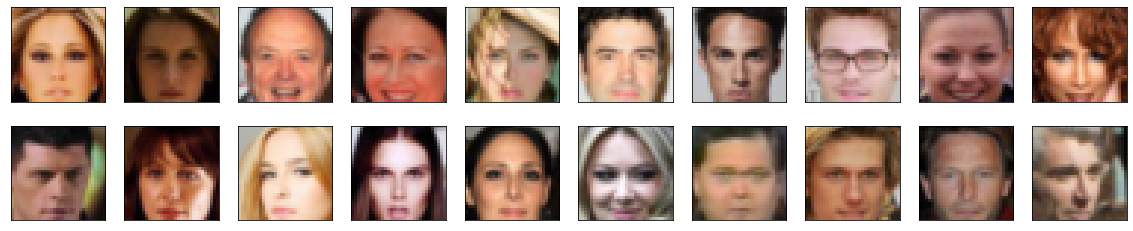

In [18]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

#### Exercise: Pre-process your image data and scale it to a pixel range of -1 to 1

You need to do a bit of pre-processing; you know that the output of a `tanh` activated generator will contain pixel values in a range from -1 to 1, and so, we need to rescale our training images to a range of -1 to 1. (Right now, they are in a range from 0-1.)

In [19]:
# TODO: Complete the scale function
def scale(x, feature_range=(-1, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1. 
       This function assumes that the input x is already scaled from 0-1.'''
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    min,max = feature_range
    x = (max-min) * x + min
    return x


In [20]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# check scaled range
# should be close to -1 to 1
img = images[0]
scaled_img = scale(img)

print('Min: ', scaled_img.min())
print('Max: ', scaled_img.max())

Min:  tensor(-0.9922)
Max:  tensor(0.9216)


---
# Define the Model

A GAN is comprised of two adversarial networks, a discriminator and a generator.

## Discriminator

Your first task will be to define the discriminator. This is a convolutional classifier like you've built before, only without any maxpooling layers. To deal with this complex data, it's suggested you use a deep network with **normalization**. You are also allowed to create any helper functions that may be useful.

#### Exercise: Complete the Discriminator class
* The inputs to the discriminator are 32x32x3 tensor images
* The output should be a single value that will indicate whether a given image is real or fake


In [21]:
import torch.nn as nn
import torch.nn.functional as F

In [22]:
import torch.nn as nn
import torch.nn.functional as F

# helper conv function
def conv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a convolutional layer, with optional batch normalization.
    """
    layers = []
    conv_layer = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, 
                           kernel_size=kernel_size, stride=stride, padding=padding, bias=False)
    
    layers.append(conv_layer)

    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))
    return nn.Sequential(*layers)

In [36]:
class Discriminator(nn.Module):

    def __init__(self, conv_dim):
        """
        Initialize the Discriminator Module
        :param conv_dim: The depth of the first convolutional layer
        """
        super(Discriminator, self).__init__()

        # complete init function
        self.conv_dim = conv_dim
        self.conv1 = conv(3,conv_dim,4,batch_norm = False)
        self.conv2 = conv(conv_dim,conv_dim*2,4)
        self.conv3 = conv(conv_dim*2,conv_dim*4,4,batch_norm=False)
        self.fc = nn.Linear(4*4*conv_dim*4,1)

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: Discriminator logits; the output of the neural network
        """
        # define feedforward behavior
        x = F.leaky_relu(self.conv1(x),0.2)
        x = F.leaky_relu(self.conv2(x),0.2)
        x = F.leaky_relu(self.conv3(x),0.2)
        x = x.view(-1,4*4*self.conv_dim*4)
        x = self.fc(x)
        return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(Discriminator)

Tests Passed


## Generator

The generator should upsample an input and generate a *new* image of the same size as our training data `32x32x3`. This should be mostly transpose convolutional layers with normalization applied to the outputs.

#### Exercise: Complete the Generator class
* The inputs to the generator are vectors of some length `z_size`
* The output should be a image of shape `32x32x3`

In [37]:
# helper deconv function
def deconv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a transpose convolutional layer, with optional batch normalization.
    """
    layers = []
    # append transpose conv layer
    layers.append(nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding, bias=False))
    # optional batch norm layer
    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))
    return nn.Sequential(*layers)

In [40]:
class Generator(nn.Module):
    
    def __init__(self, z_size, conv_dim):
        """
        Initialize the Generator Module
        :param z_size: The length of the input latent vector, z
        :param conv_dim: The depth of the inputs to the *last* transpose convolutional layer
        """
        super(Generator, self).__init__()

        # complete init function
        self.conv_dim = conv_dim
        
        self.fc = nn.Linear(z_size,4*4*conv_dim*4)
        
        self.deconv1 = deconv(4*conv_dim,conv_dim*2,4)
        self.deconv2 = deconv(conv_dim*2,conv_dim,4)
        self.deconv3 = deconv(conv_dim,3,4)

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: A 32x32x3 Tensor image as output
        """
        # define feedforward behavior
        x = self.fc(x)
        x = x.view(-1,4*self.conv_dim,4,4)
        x = F.relu(self.deconv1(x))
        x = F.relu(self.deconv2(x))
        x = torch.tanh(self.deconv3(x))
        return x

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(Generator)

Tests Passed


## Initialize the weights of your networks

To help your models converge, you should initialize the weights of the convolutional and linear layers in your model. From reading the [original DCGAN paper](https://arxiv.org/pdf/1511.06434.pdf), they say:
> All weights were initialized from a zero-centered Normal distribution with standard deviation 0.02.

So, your next task will be to define a weight initialization function that does just this!

You can refer back to the lesson on weight initialization or even consult existing model code, such as that from [the `networks.py` file in CycleGAN Github repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/models/networks.py) to help you complete this function.

#### Exercise: Complete the weight initialization function

* This should initialize only **convolutional** and **linear** layers
* Initialize the weights to a normal distribution, centered around 0, with a standard deviation of 0.02.
* The bias terms, if they exist, may be left alone or set to 0.

In [48]:
def weights_init_normal(m):
    """
    Applies initial weights to certain layers in a model .
    The weights are taken from a normal distribution 
    with mean = 0, std dev = 0.02.
    :param m: A module or layer in a network    
    """
    # classname will be something like:
    # `Conv`, `BatchNorm2d`, `Linear`, etc.
    classname = m.__class__.__name__
    
    # TODO: Apply initial weights to convolutional and linear layers
        # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        #y = (1.0/np.sqrt(n))
        m.weight.data.normal_(0, 0.02)
        m.bias.data.fill_(0)
        # for every conv layer in a model..
    if classname.find('Conv2d') != -1:
        # get the number of the inputs
        m.weight.data.normal_(0, 0.02)
    

## Build complete network

Define your models' hyperparameters and instantiate the discriminator and generator from the classes defined above. Make sure you've passed in the correct input arguments.

In [49]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
def build_network(d_conv_dim, g_conv_dim, z_size):
    # define discriminator and generator
    D = Discriminator(d_conv_dim)
    G = Generator(z_size=z_size, conv_dim=g_conv_dim)

    # initialize model weights
    D.apply(weights_init_normal)
    G.apply(weights_init_normal)

    print(D)
    print()
    print(G)
    
    return D, G


#### Exercise: Define model hyperparameters

In [50]:
# Define model hyperparams
d_conv_dim = 32
g_conv_dim = 32
z_size = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
D, G = build_network(d_conv_dim, g_conv_dim, z_size)

Discriminator(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (fc): Linear(in_features=2048, out_features=1, bias=True)
)

Generator(
  (fc): Linear(in_features=100, out_features=2048, bias=True)
  (deconv1): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (deconv2): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats

### Training on GPU

Check if you can train on GPU. Here, we'll set this as a boolean variable `train_on_gpu`. Later, you'll be responsible for making sure that 
>* Models,
* Model inputs, and
* Loss function arguments

Are moved to GPU, where appropriate.

In [51]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import torch

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Training on GPU!')

Training on GPU!


---
## Discriminator and Generator Losses

Now we need to calculate the losses for both types of adversarial networks.

### Discriminator Losses

> * For the discriminator, the total loss is the sum of the losses for real and fake images, `d_loss = d_real_loss + d_fake_loss`. 
* Remember that we want the discriminator to output 1 for real images and 0 for fake images, so we need to set up the losses to reflect that.


### Generator Loss

The generator loss will look similar only with flipped labels. The generator's goal is to get the discriminator to *think* its generated images are *real*.

#### Exercise: Complete real and fake loss functions

**You may choose to use either cross entropy or a least squares error loss to complete the following `real_loss` and `fake_loss` functions.**

In [60]:
def real_loss(D_out):
    '''Calculates how close discriminator outputs are to being real.
       param, D_out: discriminator logits
       return: real loss'''
    labels = torch.ones(D_out.size(0))
    criterion = nn.BCEWithLogitsLoss()
    if train_on_gpu:
        labels = labels.cuda()
    loss = criterion(D_out.squeeze(),labels)
    return loss

def fake_loss(D_out):
    '''Calculates how close discriminator outputs are to being fake.
       param, D_out: discriminator logits
       return: fake loss'''
    labels = torch.zeros(D_out.size(0))
    criterion = nn.BCEWithLogitsLoss()
    if train_on_gpu:
        labels = labels.cuda()
    loss = criterion(D_out.squeeze(),labels)
    return loss

## Optimizers

#### Exercise: Define optimizers for your Discriminator (D) and Generator (G)

Define optimizers for your models with appropriate hyperparameters.

In [61]:
import torch.optim as optim
# params
lr = 0.0002
beta1=0.5
beta2=0.999 # default value

# Create optimizers for the discriminator D and generator G
d_optimizer = optim.Adam(D.parameters(), lr, [beta1, beta2])
g_optimizer = optim.Adam(G.parameters(), lr, [beta1, beta2])

---
## Training

Training will involve alternating between training the discriminator and the generator. You'll use your functions `real_loss` and `fake_loss` to help you calculate the discriminator losses.

* You should train the discriminator by alternating on real and fake images
* Then the generator, which tries to trick the discriminator and should have an opposing loss function


#### Saving Samples

You've been given some code to print out some loss statistics and save some generated "fake" samples.

#### Exercise: Complete the training function

Keep in mind that, if you've moved your models to GPU, you'll also have to move any model inputs to GPU.

In [62]:
def train(D, G, n_epochs, print_every=50):
    '''Trains adversarial networks for some number of epochs
       param, D: the discriminator network
       param, G: the generator network
       param, n_epochs: number of epochs to train for
       param, print_every: when to print and record the models' losses
       return: D and G losses'''
    
    # move models to GPU
    if train_on_gpu:
        D.cuda()
        G.cuda()

    # keep track of loss and generated, "fake" samples
    samples = []
    losses = []

    # Get some fixed data for sampling. These are images that are held
    # constant throughout training, and allow us to inspect the model's performance
    sample_size=16
    fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
    fixed_z = torch.from_numpy(fixed_z).float()
    # move z to GPU if available
    if train_on_gpu:
        fixed_z = fixed_z.cuda()

    # epoch training loop
    for epoch in range(n_epochs):

        # batch training loop
        for batch_i, (real_images, _) in enumerate(celeba_train_loader):

            batch_size = real_images.size(0)
            real_images = scale(real_images)

            # ===============================================
            #         YOUR CODE HERE: TRAIN THE NETWORKS
            # ===============================================
            if train_on_gpu:
                real_images = real_images.cuda()
            d_optimizer.zero_grad()
            d_real_loss = real_loss(D(real_images))
                    # Generate fake images
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            # move x to GPU, if available
            if train_on_gpu:
                z = z.cuda()
            fake_images = G(z)
            d_fake_loss = fake_loss(D(fake_images))
            # 1. Train the discriminator on real and fake images
            d_loss = d_real_loss + d_fake_loss
            d_loss.backward()
            d_optimizer.step()
            
            
            
            # 2. Train the generator with an adversarial loss
            g_optimizer.zero_grad()
        
            #Train with fake images and flipped labels
        
            # Generate fake images
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            if train_on_gpu:
                z = z.cuda()
            fake_images = G(z)
            g_loss = real_loss(D(fake_images))
            g_loss.backward()
            g_optimizer.step()
            
            # ===============================================
            #              END OF YOUR CODE
            # ===============================================

            # Print some loss stats
            if batch_i % print_every == 0:
                # append discriminator loss and generator loss
                losses.append((d_loss.item(), g_loss.item()))
                # print discriminator and generator loss
                print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                        epoch+1, n_epochs, d_loss.item(), g_loss.item()))


        ## AFTER EACH EPOCH##    
        # this code assumes your generator is named G, feel free to change the name
        # generate and save sample, fake images
        G.eval() # for generating samples
        samples_z = G(fixed_z)
        samples.append(samples_z)
        G.train() # back to training mode

    # Save training generator samples
    with open('train_samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    # finally return losses
    return losses

Set your number of training epochs and train your GAN!

In [63]:
# set number of epochs 
n_epochs = 100


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# call training function
losses = train(D, G, n_epochs=n_epochs)

Epoch [    1/  100] | d_loss: 1.4115 | g_loss: 0.7713
Epoch [    1/  100] | d_loss: 0.0612 | g_loss: 3.8239
Epoch [    1/  100] | d_loss: 0.0411 | g_loss: 4.8147
Epoch [    1/  100] | d_loss: 0.0134 | g_loss: 5.7248
Epoch [    1/  100] | d_loss: 0.0052 | g_loss: 6.5375
Epoch [    1/  100] | d_loss: 0.0196 | g_loss: 5.6490
Epoch [    1/  100] | d_loss: 0.0961 | g_loss: 5.4069
Epoch [    1/  100] | d_loss: 1.0736 | g_loss: 11.1113
Epoch [    1/  100] | d_loss: 0.0876 | g_loss: 4.5322
Epoch [    1/  100] | d_loss: 0.3665 | g_loss: 2.0208
Epoch [    1/  100] | d_loss: 0.4249 | g_loss: 3.7425
Epoch [    1/  100] | d_loss: 0.1127 | g_loss: 2.9408
Epoch [    1/  100] | d_loss: 0.2125 | g_loss: 2.1763
Epoch [    1/  100] | d_loss: 0.1887 | g_loss: 4.5803
Epoch [    1/  100] | d_loss: 0.5202 | g_loss: 4.6644
Epoch [    1/  100] | d_loss: 0.8816 | g_loss: 0.8422
Epoch [    1/  100] | d_loss: 0.7462 | g_loss: 2.5059
Epoch [    1/  100] | d_loss: 0.3119 | g_loss: 3.5465
Epoch [    1/  100] | d_los

Epoch [    3/  100] | d_loss: 0.9683 | g_loss: 1.0977
Epoch [    3/  100] | d_loss: 0.8678 | g_loss: 1.3400
Epoch [    3/  100] | d_loss: 0.9240 | g_loss: 1.1331
Epoch [    3/  100] | d_loss: 0.6746 | g_loss: 2.0383
Epoch [    3/  100] | d_loss: 0.7667 | g_loss: 1.2342
Epoch [    3/  100] | d_loss: 0.6300 | g_loss: 2.4167
Epoch [    3/  100] | d_loss: 1.4058 | g_loss: 2.4984
Epoch [    3/  100] | d_loss: 0.7177 | g_loss: 1.5706
Epoch [    3/  100] | d_loss: 0.8679 | g_loss: 1.6224
Epoch [    3/  100] | d_loss: 0.9405 | g_loss: 1.8434
Epoch [    3/  100] | d_loss: 0.9080 | g_loss: 1.2404
Epoch [    3/  100] | d_loss: 2.3060 | g_loss: 0.4005
Epoch [    3/  100] | d_loss: 0.8689 | g_loss: 1.9072
Epoch [    3/  100] | d_loss: 0.8524 | g_loss: 1.3422
Epoch [    3/  100] | d_loss: 1.0979 | g_loss: 0.8162
Epoch [    3/  100] | d_loss: 0.8426 | g_loss: 1.3995
Epoch [    3/  100] | d_loss: 0.5809 | g_loss: 1.6351
Epoch [    3/  100] | d_loss: 0.6981 | g_loss: 1.6066
Epoch [    3/  100] | d_loss

Epoch [    6/  100] | d_loss: 0.6248 | g_loss: 1.9561
Epoch [    6/  100] | d_loss: 0.9068 | g_loss: 1.3364
Epoch [    6/  100] | d_loss: 0.4281 | g_loss: 2.7333
Epoch [    6/  100] | d_loss: 0.9952 | g_loss: 1.1604
Epoch [    6/  100] | d_loss: 0.5772 | g_loss: 1.7144
Epoch [    6/  100] | d_loss: 0.5962 | g_loss: 1.7571
Epoch [    6/  100] | d_loss: 0.6810 | g_loss: 1.0131
Epoch [    6/  100] | d_loss: 1.1319 | g_loss: 3.5191
Epoch [    6/  100] | d_loss: 0.8290 | g_loss: 1.1871
Epoch [    6/  100] | d_loss: 0.7247 | g_loss: 2.1757
Epoch [    6/  100] | d_loss: 0.5267 | g_loss: 2.3524
Epoch [    6/  100] | d_loss: 0.8724 | g_loss: 1.6111
Epoch [    6/  100] | d_loss: 0.6572 | g_loss: 1.7978
Epoch [    6/  100] | d_loss: 0.6106 | g_loss: 2.0069
Epoch [    6/  100] | d_loss: 0.7653 | g_loss: 2.6460
Epoch [    6/  100] | d_loss: 0.7917 | g_loss: 1.4696
Epoch [    6/  100] | d_loss: 0.6916 | g_loss: 1.4957
Epoch [    6/  100] | d_loss: 0.6773 | g_loss: 1.7987
Epoch [    6/  100] | d_loss

Epoch [    9/  100] | d_loss: 1.1890 | g_loss: 3.1275
Epoch [    9/  100] | d_loss: 0.4645 | g_loss: 2.0647
Epoch [    9/  100] | d_loss: 0.8667 | g_loss: 2.3417
Epoch [    9/  100] | d_loss: 0.7539 | g_loss: 3.0021
Epoch [    9/  100] | d_loss: 0.5975 | g_loss: 1.9386
Epoch [    9/  100] | d_loss: 0.5224 | g_loss: 3.1744
Epoch [    9/  100] | d_loss: 0.6948 | g_loss: 2.0138
Epoch [    9/  100] | d_loss: 0.7944 | g_loss: 1.1037
Epoch [    9/  100] | d_loss: 0.7587 | g_loss: 1.4690
Epoch [    9/  100] | d_loss: 0.2686 | g_loss: 3.7044
Epoch [    9/  100] | d_loss: 0.6376 | g_loss: 3.1174
Epoch [    9/  100] | d_loss: 0.7346 | g_loss: 2.7145
Epoch [    9/  100] | d_loss: 0.6843 | g_loss: 2.6579
Epoch [    9/  100] | d_loss: 0.6723 | g_loss: 1.7247
Epoch [    9/  100] | d_loss: 0.9405 | g_loss: 2.0296
Epoch [    9/  100] | d_loss: 0.2992 | g_loss: 2.2336
Epoch [    9/  100] | d_loss: 0.7154 | g_loss: 2.2914
Epoch [    9/  100] | d_loss: 0.7235 | g_loss: 1.4192
Epoch [    9/  100] | d_loss

Epoch [   11/  100] | d_loss: 1.0914 | g_loss: 4.1215
Epoch [   11/  100] | d_loss: 0.4721 | g_loss: 2.3891
Epoch [   11/  100] | d_loss: 0.3835 | g_loss: 3.2192
Epoch [   11/  100] | d_loss: 0.7015 | g_loss: 4.7134
Epoch [   11/  100] | d_loss: 1.1895 | g_loss: 3.9974
Epoch [   11/  100] | d_loss: 0.4567 | g_loss: 1.5646
Epoch [   11/  100] | d_loss: 0.7130 | g_loss: 2.2430
Epoch [   11/  100] | d_loss: 0.8688 | g_loss: 0.6781
Epoch [   11/  100] | d_loss: 0.6813 | g_loss: 2.5263
Epoch [   11/  100] | d_loss: 0.5950 | g_loss: 2.1400
Epoch [   11/  100] | d_loss: 0.4662 | g_loss: 2.8702
Epoch [   11/  100] | d_loss: 0.5873 | g_loss: 2.3676
Epoch [   11/  100] | d_loss: 0.9761 | g_loss: 2.0490
Epoch [   11/  100] | d_loss: 0.5107 | g_loss: 3.5188
Epoch [   11/  100] | d_loss: 0.6515 | g_loss: 1.8064
Epoch [   11/  100] | d_loss: 0.7948 | g_loss: 1.1505
Epoch [   11/  100] | d_loss: 1.5375 | g_loss: 3.6500
Epoch [   11/  100] | d_loss: 1.0076 | g_loss: 2.5138
Epoch [   12/  100] | d_loss

Epoch [   14/  100] | d_loss: 0.4786 | g_loss: 2.4851
Epoch [   14/  100] | d_loss: 0.5286 | g_loss: 1.7998
Epoch [   14/  100] | d_loss: 0.6538 | g_loss: 2.1218
Epoch [   14/  100] | d_loss: 0.5360 | g_loss: 2.3779
Epoch [   14/  100] | d_loss: 0.5766 | g_loss: 3.5766
Epoch [   14/  100] | d_loss: 0.7698 | g_loss: 1.5902
Epoch [   14/  100] | d_loss: 0.6104 | g_loss: 1.7452
Epoch [   14/  100] | d_loss: 0.4133 | g_loss: 3.5569
Epoch [   14/  100] | d_loss: 0.4605 | g_loss: 3.2249
Epoch [   14/  100] | d_loss: 1.2144 | g_loss: 4.1905
Epoch [   14/  100] | d_loss: 0.8306 | g_loss: 1.3782
Epoch [   14/  100] | d_loss: 0.2867 | g_loss: 2.3413
Epoch [   14/  100] | d_loss: 0.5432 | g_loss: 2.4549
Epoch [   14/  100] | d_loss: 0.2798 | g_loss: 1.7306
Epoch [   14/  100] | d_loss: 0.6536 | g_loss: 2.2114
Epoch [   14/  100] | d_loss: 0.4285 | g_loss: 2.4422
Epoch [   14/  100] | d_loss: 0.5754 | g_loss: 2.0337
Epoch [   14/  100] | d_loss: 0.4675 | g_loss: 3.2008
Epoch [   14/  100] | d_loss

Epoch [   17/  100] | d_loss: 0.5904 | g_loss: 2.7467
Epoch [   17/  100] | d_loss: 0.6717 | g_loss: 2.7295
Epoch [   17/  100] | d_loss: 0.4233 | g_loss: 2.2029
Epoch [   17/  100] | d_loss: 0.6917 | g_loss: 3.4137
Epoch [   17/  100] | d_loss: 0.4789 | g_loss: 2.1433
Epoch [   17/  100] | d_loss: 0.3354 | g_loss: 3.6184
Epoch [   17/  100] | d_loss: 0.5167 | g_loss: 2.5831
Epoch [   17/  100] | d_loss: 0.6703 | g_loss: 2.3175
Epoch [   17/  100] | d_loss: 0.9245 | g_loss: 1.3701
Epoch [   17/  100] | d_loss: 0.4581 | g_loss: 2.3780
Epoch [   17/  100] | d_loss: 0.4595 | g_loss: 3.1046
Epoch [   17/  100] | d_loss: 0.3847 | g_loss: 3.6304
Epoch [   17/  100] | d_loss: 0.4981 | g_loss: 3.4471
Epoch [   17/  100] | d_loss: 0.4469 | g_loss: 2.7233
Epoch [   17/  100] | d_loss: 0.5159 | g_loss: 2.2564
Epoch [   17/  100] | d_loss: 0.5466 | g_loss: 3.4829
Epoch [   17/  100] | d_loss: 0.3459 | g_loss: 3.8805
Epoch [   17/  100] | d_loss: 0.7325 | g_loss: 4.1513
Epoch [   17/  100] | d_loss

Epoch [   19/  100] | d_loss: 0.2308 | g_loss: 3.5272
Epoch [   19/  100] | d_loss: 0.5187 | g_loss: 3.1926
Epoch [   19/  100] | d_loss: 0.3896 | g_loss: 3.3546
Epoch [   19/  100] | d_loss: 0.5771 | g_loss: 4.6333
Epoch [   19/  100] | d_loss: 0.4870 | g_loss: 2.6179
Epoch [   19/  100] | d_loss: 0.6133 | g_loss: 3.7250
Epoch [   19/  100] | d_loss: 0.9594 | g_loss: 2.7944
Epoch [   19/  100] | d_loss: 0.2822 | g_loss: 3.2826
Epoch [   19/  100] | d_loss: 0.3260 | g_loss: 2.8628
Epoch [   19/  100] | d_loss: 0.3436 | g_loss: 3.4043
Epoch [   19/  100] | d_loss: 0.5430 | g_loss: 5.0472
Epoch [   19/  100] | d_loss: 0.4128 | g_loss: 3.9916
Epoch [   19/  100] | d_loss: 0.2268 | g_loss: 4.4467
Epoch [   19/  100] | d_loss: 0.4704 | g_loss: 2.7760
Epoch [   19/  100] | d_loss: 0.5979 | g_loss: 2.5509
Epoch [   19/  100] | d_loss: 0.1759 | g_loss: 4.0288
Epoch [   19/  100] | d_loss: 0.6928 | g_loss: 5.2877
Epoch [   19/  100] | d_loss: 0.4819 | g_loss: 2.3752
Epoch [   20/  100] | d_loss

Epoch [   22/  100] | d_loss: 0.4597 | g_loss: 2.9521
Epoch [   22/  100] | d_loss: 0.1563 | g_loss: 4.3441
Epoch [   22/  100] | d_loss: 0.3429 | g_loss: 2.5107
Epoch [   22/  100] | d_loss: 0.4035 | g_loss: 2.9993
Epoch [   22/  100] | d_loss: 0.2263 | g_loss: 3.4080
Epoch [   22/  100] | d_loss: 0.3399 | g_loss: 3.3249
Epoch [   22/  100] | d_loss: 0.5447 | g_loss: 3.7584
Epoch [   22/  100] | d_loss: 0.4894 | g_loss: 3.8876
Epoch [   22/  100] | d_loss: 0.5500 | g_loss: 3.0782
Epoch [   22/  100] | d_loss: 0.2045 | g_loss: 3.3493
Epoch [   22/  100] | d_loss: 0.2791 | g_loss: 4.0665
Epoch [   22/  100] | d_loss: 0.4383 | g_loss: 2.2169
Epoch [   22/  100] | d_loss: 0.4568 | g_loss: 3.2090
Epoch [   22/  100] | d_loss: 0.2814 | g_loss: 2.6553
Epoch [   22/  100] | d_loss: 0.5030 | g_loss: 2.8565
Epoch [   22/  100] | d_loss: 0.3232 | g_loss: 2.4018
Epoch [   22/  100] | d_loss: 0.4354 | g_loss: 3.0665
Epoch [   22/  100] | d_loss: 0.7011 | g_loss: 1.7995
Epoch [   22/  100] | d_loss

Epoch [   25/  100] | d_loss: 0.1977 | g_loss: 2.2559
Epoch [   25/  100] | d_loss: 0.8185 | g_loss: 0.8030
Epoch [   25/  100] | d_loss: 0.2173 | g_loss: 4.2417
Epoch [   25/  100] | d_loss: 0.2506 | g_loss: 4.1860
Epoch [   25/  100] | d_loss: 0.3861 | g_loss: 4.2005
Epoch [   25/  100] | d_loss: 0.6321 | g_loss: 2.3046
Epoch [   25/  100] | d_loss: 0.1469 | g_loss: 3.8846
Epoch [   25/  100] | d_loss: 0.1704 | g_loss: 3.3643
Epoch [   25/  100] | d_loss: 0.4901 | g_loss: 4.5068
Epoch [   25/  100] | d_loss: 0.4222 | g_loss: 4.1701
Epoch [   25/  100] | d_loss: 0.4846 | g_loss: 3.7042
Epoch [   25/  100] | d_loss: 0.2759 | g_loss: 3.4794
Epoch [   25/  100] | d_loss: 0.3141 | g_loss: 4.1700
Epoch [   25/  100] | d_loss: 0.2654 | g_loss: 4.6506
Epoch [   25/  100] | d_loss: 0.2764 | g_loss: 3.7237
Epoch [   25/  100] | d_loss: 0.2701 | g_loss: 3.7090
Epoch [   25/  100] | d_loss: 0.2960 | g_loss: 3.4125
Epoch [   25/  100] | d_loss: 0.4693 | g_loss: 4.1723
Epoch [   25/  100] | d_loss

Epoch [   27/  100] | d_loss: 0.5094 | g_loss: 3.4873
Epoch [   27/  100] | d_loss: 0.5685 | g_loss: 2.4287
Epoch [   27/  100] | d_loss: 0.2391 | g_loss: 5.9949
Epoch [   27/  100] | d_loss: 0.3007 | g_loss: 4.7804
Epoch [   27/  100] | d_loss: 0.4198 | g_loss: 3.1690
Epoch [   27/  100] | d_loss: 0.3269 | g_loss: 3.8479
Epoch [   27/  100] | d_loss: 0.1579 | g_loss: 5.3180
Epoch [   27/  100] | d_loss: 0.6376 | g_loss: 2.7479
Epoch [   27/  100] | d_loss: 0.2140 | g_loss: 5.0407
Epoch [   27/  100] | d_loss: 0.3190 | g_loss: 3.3851
Epoch [   27/  100] | d_loss: 0.5409 | g_loss: 2.4485
Epoch [   27/  100] | d_loss: 0.2979 | g_loss: 3.8635
Epoch [   27/  100] | d_loss: 0.3061 | g_loss: 3.3459
Epoch [   27/  100] | d_loss: 0.2048 | g_loss: 3.6379
Epoch [   27/  100] | d_loss: 0.2542 | g_loss: 3.4664
Epoch [   27/  100] | d_loss: 0.2802 | g_loss: 3.0769
Epoch [   27/  100] | d_loss: 0.1404 | g_loss: 3.4829
Epoch [   27/  100] | d_loss: 0.1156 | g_loss: 3.3319
Epoch [   28/  100] | d_loss

Epoch [   30/  100] | d_loss: 1.2210 | g_loss: 6.3995
Epoch [   30/  100] | d_loss: 0.1976 | g_loss: 2.8970
Epoch [   30/  100] | d_loss: 0.5620 | g_loss: 5.0371
Epoch [   30/  100] | d_loss: 0.1400 | g_loss: 4.2874
Epoch [   30/  100] | d_loss: 2.4481 | g_loss: 6.2374
Epoch [   30/  100] | d_loss: 0.2933 | g_loss: 4.4546
Epoch [   30/  100] | d_loss: 0.4522 | g_loss: 4.0828
Epoch [   30/  100] | d_loss: 0.2545 | g_loss: 4.4456
Epoch [   30/  100] | d_loss: 0.3740 | g_loss: 2.9553
Epoch [   30/  100] | d_loss: 0.3232 | g_loss: 5.3002
Epoch [   30/  100] | d_loss: 0.5696 | g_loss: 4.2131
Epoch [   30/  100] | d_loss: 4.8821 | g_loss: 0.6919
Epoch [   30/  100] | d_loss: 0.3885 | g_loss: 2.7747
Epoch [   30/  100] | d_loss: 0.2696 | g_loss: 4.8022
Epoch [   30/  100] | d_loss: 0.2679 | g_loss: 4.0028
Epoch [   30/  100] | d_loss: 0.2340 | g_loss: 4.3851
Epoch [   30/  100] | d_loss: 0.5801 | g_loss: 1.8574
Epoch [   30/  100] | d_loss: 0.3625 | g_loss: 3.5703
Epoch [   30/  100] | d_loss

Epoch [   33/  100] | d_loss: 0.3403 | g_loss: 4.7210
Epoch [   33/  100] | d_loss: 0.3847 | g_loss: 4.1548
Epoch [   33/  100] | d_loss: 0.1376 | g_loss: 4.9575
Epoch [   33/  100] | d_loss: 0.2790 | g_loss: 4.0698
Epoch [   33/  100] | d_loss: 0.2220 | g_loss: 4.2924
Epoch [   33/  100] | d_loss: 0.2836 | g_loss: 3.8055
Epoch [   33/  100] | d_loss: 0.2112 | g_loss: 4.2911
Epoch [   33/  100] | d_loss: 0.4268 | g_loss: 3.3401
Epoch [   33/  100] | d_loss: 0.1645 | g_loss: 3.6506
Epoch [   33/  100] | d_loss: 0.5458 | g_loss: 4.3586
Epoch [   33/  100] | d_loss: 1.3230 | g_loss: 4.8374
Epoch [   33/  100] | d_loss: 0.2921 | g_loss: 5.3390
Epoch [   33/  100] | d_loss: 0.3094 | g_loss: 4.3315
Epoch [   33/  100] | d_loss: 0.2566 | g_loss: 4.4155
Epoch [   33/  100] | d_loss: 0.6819 | g_loss: 4.8204
Epoch [   33/  100] | d_loss: 0.3215 | g_loss: 4.7083
Epoch [   33/  100] | d_loss: 0.2441 | g_loss: 3.7833
Epoch [   33/  100] | d_loss: 0.1976 | g_loss: 2.8484
Epoch [   33/  100] | d_loss

Epoch [   35/  100] | d_loss: 0.3606 | g_loss: 6.1744
Epoch [   35/  100] | d_loss: 0.3223 | g_loss: 4.2607
Epoch [   35/  100] | d_loss: 0.2429 | g_loss: 4.4642
Epoch [   35/  100] | d_loss: 0.2351 | g_loss: 6.6354
Epoch [   35/  100] | d_loss: 0.1475 | g_loss: 4.3488
Epoch [   35/  100] | d_loss: 0.5228 | g_loss: 4.8161
Epoch [   35/  100] | d_loss: 0.9930 | g_loss: 1.6103
Epoch [   35/  100] | d_loss: 0.2494 | g_loss: 3.9691
Epoch [   35/  100] | d_loss: 0.2691 | g_loss: 4.0130
Epoch [   35/  100] | d_loss: 0.4652 | g_loss: 3.7523
Epoch [   35/  100] | d_loss: 0.3672 | g_loss: 4.7424
Epoch [   35/  100] | d_loss: 0.1954 | g_loss: 4.3044
Epoch [   35/  100] | d_loss: 0.2554 | g_loss: 5.1611
Epoch [   35/  100] | d_loss: 0.1255 | g_loss: 3.6988
Epoch [   35/  100] | d_loss: 0.4648 | g_loss: 4.2494
Epoch [   35/  100] | d_loss: 0.2733 | g_loss: 4.4686
Epoch [   35/  100] | d_loss: 0.1478 | g_loss: 4.8640
Epoch [   35/  100] | d_loss: 0.2142 | g_loss: 4.9366
Epoch [   36/  100] | d_loss

Epoch [   38/  100] | d_loss: 0.3483 | g_loss: 4.1173
Epoch [   38/  100] | d_loss: 0.2792 | g_loss: 3.5578
Epoch [   38/  100] | d_loss: 0.2276 | g_loss: 2.0931
Epoch [   38/  100] | d_loss: 0.4179 | g_loss: 4.0456
Epoch [   38/  100] | d_loss: 0.1220 | g_loss: 5.2567
Epoch [   38/  100] | d_loss: 0.3473 | g_loss: 2.7308
Epoch [   38/  100] | d_loss: 0.1503 | g_loss: 3.3005
Epoch [   38/  100] | d_loss: 0.2534 | g_loss: 4.6100
Epoch [   38/  100] | d_loss: 0.7404 | g_loss: 2.5671
Epoch [   38/  100] | d_loss: 0.3233 | g_loss: 5.2925
Epoch [   38/  100] | d_loss: 0.3403 | g_loss: 4.3919
Epoch [   38/  100] | d_loss: 0.4372 | g_loss: 5.7773
Epoch [   38/  100] | d_loss: 0.1534 | g_loss: 6.0307
Epoch [   38/  100] | d_loss: 0.3319 | g_loss: 3.1062
Epoch [   38/  100] | d_loss: 0.3112 | g_loss: 5.8934
Epoch [   38/  100] | d_loss: 0.4101 | g_loss: 3.4933
Epoch [   38/  100] | d_loss: 0.3260 | g_loss: 4.0641
Epoch [   38/  100] | d_loss: 0.4080 | g_loss: 2.7918
Epoch [   38/  100] | d_loss

Epoch [   41/  100] | d_loss: 0.3254 | g_loss: 4.1628
Epoch [   41/  100] | d_loss: 0.2678 | g_loss: 2.6372
Epoch [   41/  100] | d_loss: 0.2408 | g_loss: 4.8944
Epoch [   41/  100] | d_loss: 0.2133 | g_loss: 5.5916
Epoch [   41/  100] | d_loss: 0.3114 | g_loss: 4.2735
Epoch [   41/  100] | d_loss: 0.0839 | g_loss: 3.6847
Epoch [   41/  100] | d_loss: 0.0911 | g_loss: 4.6800
Epoch [   41/  100] | d_loss: 0.2860 | g_loss: 3.0942
Epoch [   41/  100] | d_loss: 0.2694 | g_loss: 5.5575
Epoch [   41/  100] | d_loss: 0.2974 | g_loss: 7.0152
Epoch [   41/  100] | d_loss: 0.3434 | g_loss: 6.0014
Epoch [   41/  100] | d_loss: 0.3126 | g_loss: 7.3103
Epoch [   41/  100] | d_loss: 0.1712 | g_loss: 3.7477
Epoch [   41/  100] | d_loss: 0.2424 | g_loss: 5.2980
Epoch [   41/  100] | d_loss: 0.1083 | g_loss: 3.8511
Epoch [   41/  100] | d_loss: 0.4503 | g_loss: 3.0234
Epoch [   41/  100] | d_loss: 0.3780 | g_loss: 3.6705
Epoch [   41/  100] | d_loss: 1.3765 | g_loss: 7.6578
Epoch [   41/  100] | d_loss

Epoch [   43/  100] | d_loss: 0.2355 | g_loss: 4.5618
Epoch [   43/  100] | d_loss: 0.2909 | g_loss: 4.7679
Epoch [   43/  100] | d_loss: 0.1691 | g_loss: 5.5187
Epoch [   43/  100] | d_loss: 0.2922 | g_loss: 3.0838
Epoch [   43/  100] | d_loss: 0.2647 | g_loss: 4.3561
Epoch [   43/  100] | d_loss: 0.5891 | g_loss: 2.3253
Epoch [   43/  100] | d_loss: 0.1894 | g_loss: 4.0754
Epoch [   43/  100] | d_loss: 0.5070 | g_loss: 3.6228
Epoch [   43/  100] | d_loss: 0.2741 | g_loss: 6.7457
Epoch [   43/  100] | d_loss: 0.2310 | g_loss: 4.4844
Epoch [   43/  100] | d_loss: 0.2903 | g_loss: 4.8233
Epoch [   43/  100] | d_loss: 0.3163 | g_loss: 5.3412
Epoch [   43/  100] | d_loss: 0.3289 | g_loss: 3.8867
Epoch [   43/  100] | d_loss: 0.2104 | g_loss: 5.7184
Epoch [   43/  100] | d_loss: 0.3546 | g_loss: 4.8209
Epoch [   43/  100] | d_loss: 0.2762 | g_loss: 4.2208
Epoch [   43/  100] | d_loss: 0.7188 | g_loss: 5.3256
Epoch [   43/  100] | d_loss: 0.0996 | g_loss: 4.1079
Epoch [   44/  100] | d_loss

Epoch [   46/  100] | d_loss: 0.2689 | g_loss: 4.5304
Epoch [   46/  100] | d_loss: 0.3431 | g_loss: 5.6686
Epoch [   46/  100] | d_loss: 0.0754 | g_loss: 4.8528
Epoch [   46/  100] | d_loss: 0.4368 | g_loss: 5.2140
Epoch [   46/  100] | d_loss: 0.2007 | g_loss: 4.2587
Epoch [   46/  100] | d_loss: 0.1850 | g_loss: 4.4798
Epoch [   46/  100] | d_loss: 0.5962 | g_loss: 5.5625
Epoch [   46/  100] | d_loss: 0.2443 | g_loss: 3.7194
Epoch [   46/  100] | d_loss: 0.2068 | g_loss: 3.8058
Epoch [   46/  100] | d_loss: 0.3070 | g_loss: 5.1339
Epoch [   46/  100] | d_loss: 0.3920 | g_loss: 3.2671
Epoch [   46/  100] | d_loss: 0.3847 | g_loss: 4.2502
Epoch [   46/  100] | d_loss: 0.3260 | g_loss: 4.1347
Epoch [   46/  100] | d_loss: 0.2142 | g_loss: 4.3612
Epoch [   46/  100] | d_loss: 0.1603 | g_loss: 6.1868
Epoch [   46/  100] | d_loss: 0.2347 | g_loss: 6.2974
Epoch [   46/  100] | d_loss: 0.3860 | g_loss: 3.2431
Epoch [   46/  100] | d_loss: 0.2420 | g_loss: 5.9693
Epoch [   46/  100] | d_loss

Epoch [   49/  100] | d_loss: 0.2684 | g_loss: 3.3773
Epoch [   49/  100] | d_loss: 0.3322 | g_loss: 5.6618
Epoch [   49/  100] | d_loss: 0.2362 | g_loss: 5.2496
Epoch [   49/  100] | d_loss: 0.1471 | g_loss: 4.4777
Epoch [   49/  100] | d_loss: 0.2428 | g_loss: 5.8879
Epoch [   49/  100] | d_loss: 0.3410 | g_loss: 4.6260
Epoch [   49/  100] | d_loss: 0.2880 | g_loss: 5.0495
Epoch [   49/  100] | d_loss: 0.4770 | g_loss: 2.6243
Epoch [   49/  100] | d_loss: 0.6991 | g_loss: 6.2338
Epoch [   49/  100] | d_loss: 0.1173 | g_loss: 4.5265
Epoch [   49/  100] | d_loss: 0.2205 | g_loss: 5.6032
Epoch [   49/  100] | d_loss: 0.1596 | g_loss: 3.5124
Epoch [   49/  100] | d_loss: 0.2403 | g_loss: 4.9628
Epoch [   49/  100] | d_loss: 0.1296 | g_loss: 5.6150
Epoch [   49/  100] | d_loss: 0.2234 | g_loss: 6.3153
Epoch [   49/  100] | d_loss: 0.2497 | g_loss: 6.3003
Epoch [   49/  100] | d_loss: 0.3940 | g_loss: 7.3155
Epoch [   49/  100] | d_loss: 0.2769 | g_loss: 6.8890
Epoch [   49/  100] | d_loss

Epoch [   51/  100] | d_loss: 0.3019 | g_loss: 5.3021
Epoch [   51/  100] | d_loss: 0.4227 | g_loss: 5.0549
Epoch [   51/  100] | d_loss: 0.5017 | g_loss: 2.4076
Epoch [   51/  100] | d_loss: 0.1454 | g_loss: 5.4615
Epoch [   51/  100] | d_loss: 0.1109 | g_loss: 4.9779
Epoch [   51/  100] | d_loss: 0.1817 | g_loss: 5.8260
Epoch [   51/  100] | d_loss: 0.1448 | g_loss: 4.6173
Epoch [   51/  100] | d_loss: 0.3123 | g_loss: 5.0591
Epoch [   51/  100] | d_loss: 0.0620 | g_loss: 5.6346
Epoch [   51/  100] | d_loss: 0.2269 | g_loss: 5.3302
Epoch [   51/  100] | d_loss: 0.2058 | g_loss: 5.1252
Epoch [   51/  100] | d_loss: 0.3435 | g_loss: 5.7542
Epoch [   51/  100] | d_loss: 0.2913 | g_loss: 4.7897
Epoch [   51/  100] | d_loss: 0.3613 | g_loss: 5.3241
Epoch [   51/  100] | d_loss: 0.0450 | g_loss: 4.9771
Epoch [   51/  100] | d_loss: 0.3541 | g_loss: 5.3667
Epoch [   51/  100] | d_loss: 0.5132 | g_loss: 3.4869
Epoch [   51/  100] | d_loss: 0.2190 | g_loss: 6.0788
Epoch [   52/  100] | d_loss

Epoch [   54/  100] | d_loss: 0.2585 | g_loss: 5.8695
Epoch [   54/  100] | d_loss: 0.1668 | g_loss: 5.2261
Epoch [   54/  100] | d_loss: 0.3884 | g_loss: 5.2230
Epoch [   54/  100] | d_loss: 0.2919 | g_loss: 4.7721
Epoch [   54/  100] | d_loss: 0.4881 | g_loss: 4.4632
Epoch [   54/  100] | d_loss: 0.3097 | g_loss: 3.6890
Epoch [   54/  100] | d_loss: 0.5320 | g_loss: 5.1335
Epoch [   54/  100] | d_loss: 0.1303 | g_loss: 4.4816
Epoch [   54/  100] | d_loss: 0.1623 | g_loss: 4.1481
Epoch [   54/  100] | d_loss: 0.1968 | g_loss: 5.3532
Epoch [   54/  100] | d_loss: 0.1520 | g_loss: 4.8766
Epoch [   54/  100] | d_loss: 2.5422 | g_loss: 1.4793
Epoch [   54/  100] | d_loss: 0.2489 | g_loss: 4.0311
Epoch [   54/  100] | d_loss: 0.2201 | g_loss: 4.8291
Epoch [   54/  100] | d_loss: 0.1330 | g_loss: 4.0950
Epoch [   54/  100] | d_loss: 0.2802 | g_loss: 5.4457
Epoch [   54/  100] | d_loss: 0.3280 | g_loss: 7.1451
Epoch [   54/  100] | d_loss: 0.3408 | g_loss: 4.9143
Epoch [   54/  100] | d_loss

Epoch [   57/  100] | d_loss: 0.1190 | g_loss: 5.8853
Epoch [   57/  100] | d_loss: 0.1875 | g_loss: 3.1838
Epoch [   57/  100] | d_loss: 0.3116 | g_loss: 8.5606
Epoch [   57/  100] | d_loss: 0.2011 | g_loss: 6.8402
Epoch [   57/  100] | d_loss: 0.2574 | g_loss: 5.5849
Epoch [   57/  100] | d_loss: 0.1270 | g_loss: 5.9098
Epoch [   57/  100] | d_loss: 0.1703 | g_loss: 5.2500
Epoch [   57/  100] | d_loss: 0.0612 | g_loss: 5.9735
Epoch [   57/  100] | d_loss: 0.1504 | g_loss: 4.5984
Epoch [   57/  100] | d_loss: 0.0751 | g_loss: 4.8155
Epoch [   57/  100] | d_loss: 0.1402 | g_loss: 6.1888
Epoch [   57/  100] | d_loss: 0.1649 | g_loss: 5.7142
Epoch [   57/  100] | d_loss: 0.6086 | g_loss: 5.4357
Epoch [   57/  100] | d_loss: 0.3280 | g_loss: 4.8234
Epoch [   57/  100] | d_loss: 0.3309 | g_loss: 5.6700
Epoch [   57/  100] | d_loss: 0.8731 | g_loss: 6.5283
Epoch [   57/  100] | d_loss: 0.0666 | g_loss: 3.2018
Epoch [   57/  100] | d_loss: 0.3600 | g_loss: 5.3208
Epoch [   57/  100] | d_loss

Epoch [   59/  100] | d_loss: 0.4171 | g_loss: 4.5468
Epoch [   59/  100] | d_loss: 0.0812 | g_loss: 5.3221
Epoch [   59/  100] | d_loss: 0.1916 | g_loss: 5.7135
Epoch [   59/  100] | d_loss: 0.1516 | g_loss: 4.0057
Epoch [   59/  100] | d_loss: 0.4303 | g_loss: 4.5857
Epoch [   59/  100] | d_loss: 0.1288 | g_loss: 3.4285
Epoch [   59/  100] | d_loss: 0.3991 | g_loss: 7.2550
Epoch [   59/  100] | d_loss: 0.1704 | g_loss: 5.7827
Epoch [   59/  100] | d_loss: 0.1715 | g_loss: 6.5781
Epoch [   59/  100] | d_loss: 0.1720 | g_loss: 6.5651
Epoch [   59/  100] | d_loss: 0.1342 | g_loss: 4.4445
Epoch [   59/  100] | d_loss: 0.5069 | g_loss: 2.9243
Epoch [   59/  100] | d_loss: 0.1811 | g_loss: 5.8747
Epoch [   59/  100] | d_loss: 0.2194 | g_loss: 4.1450
Epoch [   59/  100] | d_loss: 0.1239 | g_loss: 6.2572
Epoch [   59/  100] | d_loss: 0.1073 | g_loss: 6.4252
Epoch [   59/  100] | d_loss: 0.3412 | g_loss: 4.0063
Epoch [   59/  100] | d_loss: 0.2457 | g_loss: 5.9337
Epoch [   60/  100] | d_loss

Epoch [   62/  100] | d_loss: 0.1727 | g_loss: 7.2976
Epoch [   62/  100] | d_loss: 0.1675 | g_loss: 5.4139
Epoch [   62/  100] | d_loss: 0.1480 | g_loss: 5.5260
Epoch [   62/  100] | d_loss: 0.1779 | g_loss: 6.4328
Epoch [   62/  100] | d_loss: 0.3080 | g_loss: 5.1489
Epoch [   62/  100] | d_loss: 0.0840 | g_loss: 7.3955
Epoch [   62/  100] | d_loss: 0.5113 | g_loss: 6.5360
Epoch [   62/  100] | d_loss: 0.2120 | g_loss: 4.4521
Epoch [   62/  100] | d_loss: 0.2754 | g_loss: 3.9568
Epoch [   62/  100] | d_loss: 0.1163 | g_loss: 5.2970
Epoch [   62/  100] | d_loss: 1.4874 | g_loss: 0.0008
Epoch [   62/  100] | d_loss: 0.3643 | g_loss: 5.4285
Epoch [   62/  100] | d_loss: 0.0786 | g_loss: 5.9581
Epoch [   62/  100] | d_loss: 0.1252 | g_loss: 5.2566
Epoch [   62/  100] | d_loss: 0.2150 | g_loss: 5.4290
Epoch [   62/  100] | d_loss: 0.3659 | g_loss: 4.5931
Epoch [   62/  100] | d_loss: 0.0694 | g_loss: 5.2121
Epoch [   62/  100] | d_loss: 0.1924 | g_loss: 5.2265
Epoch [   62/  100] | d_loss

Epoch [   65/  100] | d_loss: 0.4847 | g_loss: 4.2714
Epoch [   65/  100] | d_loss: 0.3598 | g_loss: 5.2232
Epoch [   65/  100] | d_loss: 0.1313 | g_loss: 4.8433
Epoch [   65/  100] | d_loss: 0.1691 | g_loss: 6.4440
Epoch [   65/  100] | d_loss: 0.1535 | g_loss: 4.9810
Epoch [   65/  100] | d_loss: 0.1114 | g_loss: 6.4526
Epoch [   65/  100] | d_loss: 0.1788 | g_loss: 6.4924
Epoch [   65/  100] | d_loss: 0.1352 | g_loss: 5.8501
Epoch [   65/  100] | d_loss: 0.1355 | g_loss: 6.2646
Epoch [   65/  100] | d_loss: 0.6376 | g_loss: 6.2672
Epoch [   65/  100] | d_loss: 0.2787 | g_loss: 5.6934
Epoch [   65/  100] | d_loss: 0.1743 | g_loss: 5.5025
Epoch [   65/  100] | d_loss: 0.0320 | g_loss: 7.4610
Epoch [   65/  100] | d_loss: 0.2156 | g_loss: 4.2144
Epoch [   65/  100] | d_loss: 0.0668 | g_loss: 5.8790
Epoch [   65/  100] | d_loss: 0.7403 | g_loss: 7.2509
Epoch [   65/  100] | d_loss: 0.1450 | g_loss: 5.3763
Epoch [   65/  100] | d_loss: 0.1176 | g_loss: 6.0339
Epoch [   65/  100] | d_loss

Epoch [   67/  100] | d_loss: 0.3786 | g_loss: 4.1139
Epoch [   67/  100] | d_loss: 0.2788 | g_loss: 4.3768
Epoch [   67/  100] | d_loss: 0.1111 | g_loss: 5.4172
Epoch [   67/  100] | d_loss: 0.3144 | g_loss: 5.5656
Epoch [   67/  100] | d_loss: 0.1721 | g_loss: 5.8887
Epoch [   67/  100] | d_loss: 0.0668 | g_loss: 5.4071
Epoch [   67/  100] | d_loss: 0.3517 | g_loss: 5.6976
Epoch [   67/  100] | d_loss: 0.5702 | g_loss: 6.3599
Epoch [   67/  100] | d_loss: 0.3651 | g_loss: 5.8207
Epoch [   67/  100] | d_loss: 0.3076 | g_loss: 4.4630
Epoch [   67/  100] | d_loss: 0.1789 | g_loss: 5.4911
Epoch [   67/  100] | d_loss: 0.0496 | g_loss: 6.4177
Epoch [   67/  100] | d_loss: 0.1571 | g_loss: 4.2290
Epoch [   67/  100] | d_loss: 0.2763 | g_loss: 3.3396
Epoch [   67/  100] | d_loss: 0.2824 | g_loss: 6.5947
Epoch [   67/  100] | d_loss: 0.1903 | g_loss: 6.0016
Epoch [   67/  100] | d_loss: 0.0647 | g_loss: 5.0494
Epoch [   67/  100] | d_loss: 0.2450 | g_loss: 5.5297
Epoch [   68/  100] | d_loss

Epoch [   70/  100] | d_loss: 0.2396 | g_loss: 6.2229
Epoch [   70/  100] | d_loss: 0.2367 | g_loss: 5.7740
Epoch [   70/  100] | d_loss: 0.2175 | g_loss: 5.5771
Epoch [   70/  100] | d_loss: 0.2555 | g_loss: 6.5766
Epoch [   70/  100] | d_loss: 0.1699 | g_loss: 5.5036
Epoch [   70/  100] | d_loss: 0.4096 | g_loss: 6.3334
Epoch [   70/  100] | d_loss: 0.1218 | g_loss: 6.1014
Epoch [   70/  100] | d_loss: 0.0472 | g_loss: 5.6424
Epoch [   70/  100] | d_loss: 0.3335 | g_loss: 9.4879
Epoch [   70/  100] | d_loss: 0.3016 | g_loss: 5.6779
Epoch [   70/  100] | d_loss: 0.4032 | g_loss: 6.2274
Epoch [   70/  100] | d_loss: 0.4044 | g_loss: 6.4210
Epoch [   70/  100] | d_loss: 0.4634 | g_loss: 5.5955
Epoch [   70/  100] | d_loss: 0.0999 | g_loss: 7.1152
Epoch [   70/  100] | d_loss: 0.1968 | g_loss: 5.5875
Epoch [   70/  100] | d_loss: 0.0644 | g_loss: 5.8066
Epoch [   70/  100] | d_loss: 0.1637 | g_loss: 3.5396
Epoch [   70/  100] | d_loss: 0.2272 | g_loss: 5.9857
Epoch [   70/  100] | d_loss

Epoch [   73/  100] | d_loss: 0.1058 | g_loss: 5.8921
Epoch [   73/  100] | d_loss: 0.1002 | g_loss: 7.4348
Epoch [   73/  100] | d_loss: 0.1862 | g_loss: 5.3436
Epoch [   73/  100] | d_loss: 0.1089 | g_loss: 5.8414
Epoch [   73/  100] | d_loss: 0.1972 | g_loss: 5.5314
Epoch [   73/  100] | d_loss: 0.1505 | g_loss: 7.0955
Epoch [   73/  100] | d_loss: 0.0540 | g_loss: 4.9473
Epoch [   73/  100] | d_loss: 0.1856 | g_loss: 7.5607
Epoch [   73/  100] | d_loss: 0.0803 | g_loss: 4.2846
Epoch [   73/  100] | d_loss: 0.3234 | g_loss: 5.8276
Epoch [   73/  100] | d_loss: 0.0545 | g_loss: 7.0549
Epoch [   73/  100] | d_loss: 0.1413 | g_loss: 7.2408
Epoch [   73/  100] | d_loss: 0.1674 | g_loss: 6.6246
Epoch [   73/  100] | d_loss: 0.0574 | g_loss: 7.4198
Epoch [   73/  100] | d_loss: 0.3824 | g_loss: 4.3331
Epoch [   73/  100] | d_loss: 0.2214 | g_loss: 8.0518
Epoch [   73/  100] | d_loss: 0.1930 | g_loss: 6.7477
Epoch [   73/  100] | d_loss: 0.3616 | g_loss: 5.5332
Epoch [   73/  100] | d_loss

Epoch [   75/  100] | d_loss: 0.2015 | g_loss: 5.5135
Epoch [   75/  100] | d_loss: 0.1152 | g_loss: 5.3627
Epoch [   75/  100] | d_loss: 0.2067 | g_loss: 4.8709
Epoch [   75/  100] | d_loss: 0.2186 | g_loss: 4.5201
Epoch [   75/  100] | d_loss: 0.0764 | g_loss: 4.8163
Epoch [   75/  100] | d_loss: 0.4037 | g_loss: 4.4064
Epoch [   75/  100] | d_loss: 0.6185 | g_loss: 7.2169
Epoch [   75/  100] | d_loss: 0.1014 | g_loss: 5.1884
Epoch [   75/  100] | d_loss: 0.3162 | g_loss: 5.5934
Epoch [   75/  100] | d_loss: 0.1480 | g_loss: 7.5256
Epoch [   75/  100] | d_loss: 0.2291 | g_loss: 5.8810
Epoch [   75/  100] | d_loss: 0.1255 | g_loss: 5.8337
Epoch [   75/  100] | d_loss: 0.2062 | g_loss: 5.0743
Epoch [   75/  100] | d_loss: 0.3481 | g_loss: 8.0885
Epoch [   75/  100] | d_loss: 0.2189 | g_loss: 5.4869
Epoch [   75/  100] | d_loss: 0.1540 | g_loss: 6.8065
Epoch [   75/  100] | d_loss: 0.0374 | g_loss: 8.7034
Epoch [   75/  100] | d_loss: 0.2951 | g_loss: 3.8705
Epoch [   76/  100] | d_loss

Epoch [   78/  100] | d_loss: 0.2105 | g_loss: 6.0224
Epoch [   78/  100] | d_loss: 0.3073 | g_loss: 5.5551
Epoch [   78/  100] | d_loss: 0.1400 | g_loss: 6.3885
Epoch [   78/  100] | d_loss: 0.2014 | g_loss: 5.2656
Epoch [   78/  100] | d_loss: 0.3303 | g_loss: 6.5849
Epoch [   78/  100] | d_loss: 0.2180 | g_loss: 6.9759
Epoch [   78/  100] | d_loss: 0.1790 | g_loss: 7.0239
Epoch [   78/  100] | d_loss: 0.2856 | g_loss: 6.8951
Epoch [   78/  100] | d_loss: 0.0427 | g_loss: 5.2527
Epoch [   78/  100] | d_loss: 0.0533 | g_loss: 6.4548
Epoch [   78/  100] | d_loss: 0.0221 | g_loss: 6.1006
Epoch [   78/  100] | d_loss: 0.1567 | g_loss: 5.7243
Epoch [   78/  100] | d_loss: 0.1078 | g_loss: 6.6042
Epoch [   78/  100] | d_loss: 0.0353 | g_loss: 6.2923
Epoch [   78/  100] | d_loss: 0.1466 | g_loss: 5.8576
Epoch [   78/  100] | d_loss: 0.2839 | g_loss: 7.2494
Epoch [   78/  100] | d_loss: 0.1223 | g_loss: 6.0851
Epoch [   78/  100] | d_loss: 0.3077 | g_loss: 5.6454
Epoch [   78/  100] | d_loss

Epoch [   81/  100] | d_loss: 0.1086 | g_loss: 6.0111
Epoch [   81/  100] | d_loss: 0.3142 | g_loss: 6.9420
Epoch [   81/  100] | d_loss: 0.1679 | g_loss: 6.1358
Epoch [   81/  100] | d_loss: 0.1573 | g_loss: 5.6112
Epoch [   81/  100] | d_loss: 0.0860 | g_loss: 6.3005
Epoch [   81/  100] | d_loss: 0.0790 | g_loss: 6.6227
Epoch [   81/  100] | d_loss: 0.1889 | g_loss: 5.9068
Epoch [   81/  100] | d_loss: 0.5962 | g_loss: 5.1570
Epoch [   81/  100] | d_loss: 0.3967 | g_loss: 6.1967
Epoch [   81/  100] | d_loss: 0.0851 | g_loss: 6.3230
Epoch [   81/  100] | d_loss: 0.1778 | g_loss: 7.6220
Epoch [   81/  100] | d_loss: 0.1003 | g_loss: 6.6137
Epoch [   81/  100] | d_loss: 0.0278 | g_loss: 6.8450
Epoch [   81/  100] | d_loss: 0.1561 | g_loss: 6.3279
Epoch [   81/  100] | d_loss: 0.0553 | g_loss: 6.3485
Epoch [   81/  100] | d_loss: 0.3170 | g_loss: 6.3600
Epoch [   81/  100] | d_loss: 0.3163 | g_loss: 7.4428
Epoch [   81/  100] | d_loss: 0.1782 | g_loss: 6.6332
Epoch [   81/  100] | d_loss

Epoch [   83/  100] | d_loss: 0.2750 | g_loss: 7.6687
Epoch [   83/  100] | d_loss: 0.0410 | g_loss: 5.7443
Epoch [   83/  100] | d_loss: 0.0697 | g_loss: 7.0181
Epoch [   83/  100] | d_loss: 0.1193 | g_loss: 6.7052
Epoch [   83/  100] | d_loss: 0.1252 | g_loss: 6.2821
Epoch [   83/  100] | d_loss: 0.0322 | g_loss: 7.8868
Epoch [   83/  100] | d_loss: 0.0854 | g_loss: 7.4839
Epoch [   83/  100] | d_loss: 0.2549 | g_loss: 3.5238
Epoch [   83/  100] | d_loss: 0.1721 | g_loss: 4.8712
Epoch [   83/  100] | d_loss: 0.1013 | g_loss: 6.4553
Epoch [   83/  100] | d_loss: 0.2664 | g_loss: 7.1210
Epoch [   83/  100] | d_loss: 1.6171 | g_loss: 0.8418
Epoch [   83/  100] | d_loss: 0.4116 | g_loss: 3.2358
Epoch [   83/  100] | d_loss: 0.2361 | g_loss: 3.7651
Epoch [   83/  100] | d_loss: 0.3055 | g_loss: 6.0470
Epoch [   83/  100] | d_loss: 0.0883 | g_loss: 5.7926
Epoch [   83/  100] | d_loss: 0.3239 | g_loss: 7.8830
Epoch [   83/  100] | d_loss: 0.0924 | g_loss: 7.1057
Epoch [   84/  100] | d_loss

Epoch [   86/  100] | d_loss: 0.3465 | g_loss: 5.0567
Epoch [   86/  100] | d_loss: 0.0537 | g_loss: 7.1237
Epoch [   86/  100] | d_loss: 0.0738 | g_loss: 6.1524
Epoch [   86/  100] | d_loss: 0.0977 | g_loss: 6.3787
Epoch [   86/  100] | d_loss: 0.4845 | g_loss: 5.6178
Epoch [   86/  100] | d_loss: 0.3548 | g_loss: 5.2670
Epoch [   86/  100] | d_loss: 0.0961 | g_loss: 7.9558
Epoch [   86/  100] | d_loss: 0.1501 | g_loss: 4.8977
Epoch [   86/  100] | d_loss: 0.2907 | g_loss: 5.7468
Epoch [   86/  100] | d_loss: 0.3380 | g_loss: 6.6014
Epoch [   86/  100] | d_loss: 0.1790 | g_loss: 7.9518
Epoch [   86/  100] | d_loss: 0.1506 | g_loss: 5.2850
Epoch [   86/  100] | d_loss: 0.3669 | g_loss: 6.4946
Epoch [   86/  100] | d_loss: 0.2280 | g_loss: 6.3849
Epoch [   86/  100] | d_loss: 0.4121 | g_loss: 8.5286
Epoch [   86/  100] | d_loss: 0.0574 | g_loss: 4.4948
Epoch [   86/  100] | d_loss: 0.1231 | g_loss: 6.1869
Epoch [   86/  100] | d_loss: 0.0836 | g_loss: 7.3119
Epoch [   86/  100] | d_loss

Epoch [   89/  100] | d_loss: 0.1637 | g_loss: 6.8656
Epoch [   89/  100] | d_loss: 0.1054 | g_loss: 8.1902
Epoch [   89/  100] | d_loss: 0.1238 | g_loss: 7.2269
Epoch [   89/  100] | d_loss: 0.1652 | g_loss: 6.3018
Epoch [   89/  100] | d_loss: 0.1778 | g_loss: 6.4072
Epoch [   89/  100] | d_loss: 0.2710 | g_loss: 6.8349
Epoch [   89/  100] | d_loss: 0.5344 | g_loss: 7.8560
Epoch [   89/  100] | d_loss: 0.1684 | g_loss: 4.9959
Epoch [   89/  100] | d_loss: 0.0873 | g_loss: 8.3978
Epoch [   89/  100] | d_loss: 0.1791 | g_loss: 6.5606
Epoch [   89/  100] | d_loss: 0.0770 | g_loss: 5.0384
Epoch [   89/  100] | d_loss: 0.1715 | g_loss: 5.7754
Epoch [   89/  100] | d_loss: 0.1393 | g_loss: 6.6486
Epoch [   89/  100] | d_loss: 0.0469 | g_loss: 7.5288
Epoch [   89/  100] | d_loss: 0.2871 | g_loss: 6.2794
Epoch [   89/  100] | d_loss: 0.0997 | g_loss: 7.9024
Epoch [   89/  100] | d_loss: 0.1124 | g_loss: 6.5941
Epoch [   89/  100] | d_loss: 0.2028 | g_loss: 5.6895
Epoch [   89/  100] | d_loss

Epoch [   91/  100] | d_loss: 0.1034 | g_loss: 6.6122
Epoch [   91/  100] | d_loss: 0.1000 | g_loss: 6.4089
Epoch [   91/  100] | d_loss: 0.1383 | g_loss: 4.0468
Epoch [   91/  100] | d_loss: 0.0620 | g_loss: 5.2940
Epoch [   91/  100] | d_loss: 0.0811 | g_loss: 7.1781
Epoch [   91/  100] | d_loss: 0.2891 | g_loss: 7.1495
Epoch [   91/  100] | d_loss: 0.1548 | g_loss: 8.2333
Epoch [   91/  100] | d_loss: 0.1437 | g_loss: 6.8913
Epoch [   91/  100] | d_loss: 0.2974 | g_loss: 6.5007
Epoch [   91/  100] | d_loss: 0.0507 | g_loss: 5.4768
Epoch [   91/  100] | d_loss: 0.1577 | g_loss: 6.3687
Epoch [   91/  100] | d_loss: 0.1478 | g_loss: 6.7145
Epoch [   91/  100] | d_loss: 0.5926 | g_loss: 4.2716
Epoch [   91/  100] | d_loss: 0.1547 | g_loss: 5.4427
Epoch [   91/  100] | d_loss: 0.1112 | g_loss: 6.2260
Epoch [   91/  100] | d_loss: 0.1011 | g_loss: 5.4223
Epoch [   91/  100] | d_loss: 1.0476 | g_loss: 8.8155
Epoch [   91/  100] | d_loss: 0.2619 | g_loss: 7.5364
Epoch [   92/  100] | d_loss

Epoch [   94/  100] | d_loss: 0.3350 | g_loss: 9.2740
Epoch [   94/  100] | d_loss: 0.1181 | g_loss: 5.4083
Epoch [   94/  100] | d_loss: 0.1246 | g_loss: 6.9133
Epoch [   94/  100] | d_loss: 0.2440 | g_loss: 8.1052
Epoch [   94/  100] | d_loss: 0.0244 | g_loss: 6.3293
Epoch [   94/  100] | d_loss: 0.1528 | g_loss: 8.7194
Epoch [   94/  100] | d_loss: 0.0439 | g_loss: 6.4315
Epoch [   94/  100] | d_loss: 0.1318 | g_loss: 6.6041
Epoch [   94/  100] | d_loss: 0.2220 | g_loss: 7.1284
Epoch [   94/  100] | d_loss: 0.2197 | g_loss: 4.6208
Epoch [   94/  100] | d_loss: 0.2256 | g_loss: 7.4685
Epoch [   94/  100] | d_loss: 0.2531 | g_loss: 6.6878
Epoch [   94/  100] | d_loss: 0.1831 | g_loss: 5.4074
Epoch [   94/  100] | d_loss: 0.1259 | g_loss: 7.4000
Epoch [   94/  100] | d_loss: 0.1529 | g_loss: 7.1527
Epoch [   94/  100] | d_loss: 0.0989 | g_loss: 8.4956
Epoch [   94/  100] | d_loss: 0.0544 | g_loss: 7.1480
Epoch [   94/  100] | d_loss: 0.1641 | g_loss: 7.6268
Epoch [   94/  100] | d_loss

Epoch [   97/  100] | d_loss: 0.0951 | g_loss: 6.3831
Epoch [   97/  100] | d_loss: 0.2272 | g_loss: 6.1820
Epoch [   97/  100] | d_loss: 0.2159 | g_loss: 7.2904
Epoch [   97/  100] | d_loss: 0.3365 | g_loss: 7.1654
Epoch [   97/  100] | d_loss: 0.1482 | g_loss: 6.8324
Epoch [   97/  100] | d_loss: 0.0980 | g_loss: 7.6943
Epoch [   97/  100] | d_loss: 0.2344 | g_loss: 5.6983
Epoch [   97/  100] | d_loss: 0.1381 | g_loss: 7.7442
Epoch [   97/  100] | d_loss: 0.0727 | g_loss: 5.8509
Epoch [   97/  100] | d_loss: 0.1124 | g_loss: 7.6252
Epoch [   97/  100] | d_loss: 0.0767 | g_loss: 7.1517
Epoch [   97/  100] | d_loss: 0.1072 | g_loss: 6.5121
Epoch [   97/  100] | d_loss: 0.1027 | g_loss: 6.0358
Epoch [   97/  100] | d_loss: 0.0633 | g_loss: 8.5752
Epoch [   97/  100] | d_loss: 0.1555 | g_loss: 6.9006
Epoch [   97/  100] | d_loss: 0.0650 | g_loss: 7.2914
Epoch [   97/  100] | d_loss: 0.0725 | g_loss: 6.0931
Epoch [   97/  100] | d_loss: 0.0557 | g_loss: 5.0034
Epoch [   97/  100] | d_loss

Epoch [   99/  100] | d_loss: 0.0469 | g_loss: 7.6106
Epoch [   99/  100] | d_loss: 0.1732 | g_loss: 7.7007
Epoch [   99/  100] | d_loss: 0.0610 | g_loss: 5.9749
Epoch [   99/  100] | d_loss: 0.1509 | g_loss: 7.4996
Epoch [   99/  100] | d_loss: 0.1900 | g_loss: 7.0170
Epoch [   99/  100] | d_loss: 0.3024 | g_loss: 6.1143
Epoch [   99/  100] | d_loss: 0.1344 | g_loss: 5.7801
Epoch [   99/  100] | d_loss: 0.1439 | g_loss: 7.4176
Epoch [   99/  100] | d_loss: 0.0338 | g_loss: 6.7270
Epoch [   99/  100] | d_loss: 0.0930 | g_loss: 5.3803
Epoch [   99/  100] | d_loss: 0.1802 | g_loss: 4.3408
Epoch [   99/  100] | d_loss: 0.0732 | g_loss: 6.1263
Epoch [   99/  100] | d_loss: 0.1505 | g_loss: 5.3024
Epoch [   99/  100] | d_loss: 0.0760 | g_loss: 7.3290
Epoch [   99/  100] | d_loss: 0.2242 | g_loss: 4.7552
Epoch [   99/  100] | d_loss: 0.1168 | g_loss: 6.9167
Epoch [   99/  100] | d_loss: 0.1169 | g_loss: 6.9459
Epoch [   99/  100] | d_loss: 0.1255 | g_loss: 6.4174
Epoch [  100/  100] | d_loss

## Training loss

Plot the training losses for the generator and discriminator, recorded after each epoch.

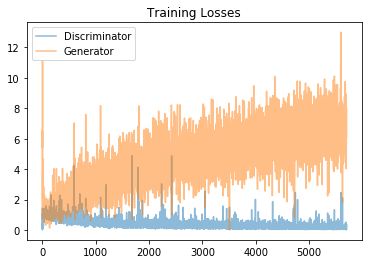

In [64]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

## Generator samples from training

View samples of images from the generator, and answer a question about the strengths and weaknesses of your trained models.

In [65]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = ((img + 1)*255 / (2)).astype(np.uint8)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((32,32,3)))

In [66]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

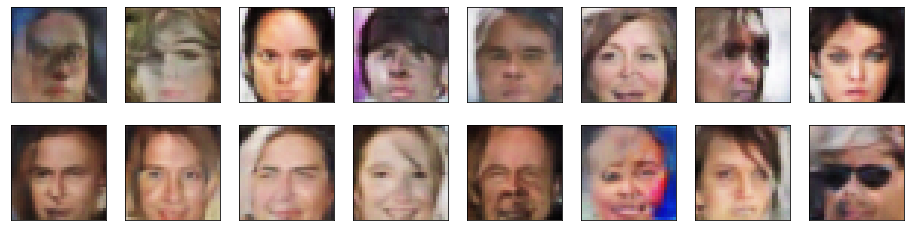

In [67]:
_ = view_samples(-1, samples)

### Question: What do you notice about your generated samples and how might you improve this model?
When you answer this question, consider the following factors:
* The dataset is biased; it is made of "celebrity" faces that are mostly white
* Model size; larger models have the opportunity to learn more features in a data feature space
* Optimization strategy; optimizers and number of epochs affect your final result


**Answer:** 
- I noticed that the samples are good with women more than men, there are 4 pics which have no specific face but a mix of more than two but the other samples did pretty well in gathering one face.
- the resolution of the pictures is not very good, so using image size bigger than the one used will produce better results 
- increasing the number of epochs won't make it better
- learning rate = 0.0002 is better than 0.002 

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "problem_unittests.py" files in your submission.